In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv("../../data/quarterly_data.csv", encoding = 'unicode_escape')

In [3]:
df1 = df.replace("..", np.nan)

In [4]:
df1

,Postal code,Building type,2010Q1 Price per square meter (EUR/m2),2010Q2 Price per square meter (EUR/m2),2010Q3 Price per square meter (EUR/m2),2010Q4 Price per square meter (EUR/m2),2011Q1 Price per square meter (EUR/m2),2011Q2 Price per square meter (EUR/m2),2011Q3 Price per square meter (EUR/m2),2011Q4 Price per square meter (EUR/m2),...,2019Q1 Price per square meter (EUR/m2),2019Q2 Price per square meter (EUR/m2),2019Q3 Price per square meter (EUR/m2),2019Q4 Price per square meter (EUR/m2),2020Q1 Price per square meter (EUR/m2),2020Q2 Price per square meter (EUR/m2),2020Q3 Price per square meter (EUR/m2),2020Q4 Price per square meter (EUR/m2),2021Q1* Price per square meter (EUR/m2),2021Q2* Price per square meter (EUR/m2)
0,00100 Helsinki Keskusta - Etu-Töölö (Helsinki ),"Blocks of flats, one-room flat",5458,5347,5826,5566,5545,5812,5909,5856,...,7755,8332,8130,8068,7802,8543,9170,7517,8872,8596
1,00100 Helsinki Keskusta - Etu-Töölö (Helsinki ),"Blocks of flats, two-room flat",5164,5021,5081,5006,5713,5866,5552,5614,...,6914,7694,6901,7435,7573,7398,7868,7700,7829,7974
2,00100 Helsinki Keskusta - Etu-Töölö (Helsinki ),"Blocks of flats, three-room flat+",4944,5396,4828,5394,5571,5709,5450,5010,...,6883,6846,7379,6728,7205,6678,7178,7405,8053,8174
3,00100 Helsinki Keskusta - Etu-Töölö (Helsinki ),Blocks of flats total,5168,5219,5181,5269,5632,5807,5630,5511,...,7043,7478,7476,7345,7460,7275,8058,7540,8188,8188
4,00100 Helsinki Keskusta - Etu-Töölö (Helsinki ),Terraced houses total,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10069,99980 Utsjoki Keskus (Utsjoki ),"Blocks of flats, two-room flat",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10070,99980 Utsjoki Keskus (Utsjoki ),"Blocks of flats, three-room flat+",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10071,99980 Utsjoki Keskus (Utsjoki ),Blocks of flats total,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10072,99980 Utsjoki Keskus (Utsjoki ),Terraced houses total,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# original source https://machinelearningmastery.com/iterative-imputation-for-missing-values-in-machine-learning/
# summarize the number of rows with missing values for each column
for i in range(df1.shape[1]):
    n_miss = df1.iloc[:,i].isnull().sum()
    perc = n_miss / df1.shape[0] * 100
    print('> %d, Missing: %d (%.1f%%)' % (i, n_miss, perc))

> 0, Missing: 0 (0.0%)
> 1, Missing: 0 (0.0%)
> 2, Missing: 8466 (84.0%)
> 3, Missing: 8371 (83.1%)
> 4, Missing: 8437 (83.8%)
> 5, Missing: 8470 (84.1%)
> 6, Missing: 8429 (83.7%)
> 7, Missing: 8383 (83.2%)
> 8, Missing: 8401 (83.4%)
> 9, Missing: 8676 (86.1%)
> 10, Missing: 8517 (84.5%)
> 11, Missing: 8388 (83.3%)
> 12, Missing: 7979 (79.2%)
> 13, Missing: 8071 (80.1%)
> 14, Missing: 8538 (84.8%)
> 15, Missing: 8544 (84.8%)
> 16, Missing: 8596 (85.3%)
> 17, Missing: 8736 (86.7%)
> 18, Missing: 8683 (86.2%)
> 19, Missing: 8637 (85.7%)
> 20, Missing: 8653 (85.9%)
> 21, Missing: 8760 (87.0%)
> 22, Missing: 8687 (86.2%)
> 23, Missing: 8612 (85.5%)
> 24, Missing: 8579 (85.2%)
> 25, Missing: 8677 (86.1%)
> 26, Missing: 8747 (86.8%)
> 27, Missing: 8551 (84.9%)
> 28, Missing: 8647 (85.8%)
> 29, Missing: 8769 (87.0%)
> 30, Missing: 8640 (85.8%)
> 31, Missing: 8682 (86.2%)
> 32, Missing: 8575 (85.1%)
> 33, Missing: 8739 (86.7%)
> 34, Missing: 8721 (86.6%)
> 35, Missing: 8655 (85.9%)
> 36, Miss

In [6]:
## Categories and numerical features to different dfs

cat = df1.iloc[:,0:2]
num = df1.iloc[:,2:]
num_columns = num.columns

In [7]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imp = IterativeImputer(max_iter=10, random_state=0)
num_imp = imp.fit_transform(num)

/Users/kenriippa/Documents/School/OP-Forecasting-Future-House-Prices/venv/lib/python3.8/site-packages/sklearn/impute/_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [8]:
df_num_imp = pd.DataFrame(num_imp, columns=num_columns)
df_num_imp

,2010Q1 Price per square meter (EUR/m2),2010Q2 Price per square meter (EUR/m2),2010Q3 Price per square meter (EUR/m2),2010Q4 Price per square meter (EUR/m2),2011Q1 Price per square meter (EUR/m2),2011Q2 Price per square meter (EUR/m2),2011Q3 Price per square meter (EUR/m2),2011Q4 Price per square meter (EUR/m2),2012Q1 Price per square meter (EUR/m2),2012Q2 Price per square meter (EUR/m2),...,2019Q1 Price per square meter (EUR/m2),2019Q2 Price per square meter (EUR/m2),2019Q3 Price per square meter (EUR/m2),2019Q4 Price per square meter (EUR/m2),2020Q1 Price per square meter (EUR/m2),2020Q2 Price per square meter (EUR/m2),2020Q3 Price per square meter (EUR/m2),2020Q4 Price per square meter (EUR/m2),2021Q1* Price per square meter (EUR/m2),2021Q2* Price per square meter (EUR/m2)
0,5458.000000,5347.000000,5826.000000,5566.000000,5545.000000,5812.000000,5909.000000,5856.000000,5785.000000,6436.000000,...,7755.000000,8332.000000,8130.000000,8068.0000,7802.000000,8543.000000,9170.000000,7517.000000,8872.000000,8596.000000
1,5164.000000,5021.000000,5081.000000,5006.000000,5713.000000,5866.000000,5552.000000,5614.000000,6020.000000,5814.000000,...,6914.000000,7694.000000,6901.000000,7435.0000,7573.000000,7398.000000,7868.000000,7700.000000,7829.000000,7974.000000
2,4944.000000,5396.000000,4828.000000,5394.000000,5571.000000,5709.000000,5450.000000,5010.000000,5704.000000,5466.000000,...,6883.000000,6846.000000,7379.000000,6728.0000,7205.000000,6678.000000,7178.000000,7405.000000,8053.000000,8174.000000
3,5168.000000,5219.000000,5181.000000,5269.000000,5632.000000,5807.000000,5630.000000,5511.000000,5843.000000,5899.000000,...,7043.000000,7478.000000,7476.000000,7345.0000,7460.000000,7275.000000,8058.000000,7540.000000,8188.000000,8188.000000
4,1783.222523,1824.975495,1837.301766,1822.620585,1869.018392,1898.716837,1894.228569,1862.702913,1900.623898,1930.519312,...,2084.801645,2117.757075,2101.019245,2069.1361,2135.629373,2152.308609,2173.893109,2172.261334,2219.056507,2290.004173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10069,1783.222523,1824.975495,1837.301766,1822.620585,1869.018392,1898.716837,1894.228569,1862.702913,1900.623898,1930.519312,...,2084.801645,2117.757075,2101.019245,2069.1361,2135.629373,2152.308609,2173.893109,2172.261334,2219.056507,2290.004173
10070,1783.222523,1824.975495,1837.301766,1822.620585,1869.018392,1898.716837,1894.228569,1862.702913,1900.623898,1930.519312,...,2084.801645,2117.757075,2101.019245,2069.1361,2135.629373,2152.308609,2173.893109,2172.261334,2219.056507,2290.004173
10071,1783.222523,1824.975495,1837.301766,1822.620585,1869.018392,1898.716837,1894.228569,1862.702913,1900.623898,1930.519312,...,2084.801645,2117.757075,2101.019245,2069.1361,2135.629373,2152.308609,2173.893109,2172.261334,2219.056507,2290.004173
10072,1783.222523,1824.975495,1837.301766,1822.620585,1869.018392,1898.716837,1894.228569,1862.702913,1900.623898,1930.519312,...,2084.801645,2117.757075,2101.019245,2069.1361,2135.629373,2152.308609,2173.893109,2172.261334,2219.056507,2290.004173


In [9]:
df_num_imp.isnull().sum()

2010Q1 Price per square meter (EUR/m2)     0
2010Q2 Price per square meter (EUR/m2)     0
2010Q3 Price per square meter (EUR/m2)     0
2010Q4 Price per square meter (EUR/m2)     0
2011Q1 Price per square meter (EUR/m2)     0
2011Q2 Price per square meter (EUR/m2)     0
2011Q3 Price per square meter (EUR/m2)     0
2011Q4 Price per square meter (EUR/m2)     0
2012Q1 Price per square meter (EUR/m2)     0
2012Q2 Price per square meter (EUR/m2)     0
2012Q3 Price per square meter (EUR/m2)     0
2012Q4 Price per square meter (EUR/m2)     0
2013Q1 Price per square meter (EUR/m2)     0
2013Q2 Price per square meter (EUR/m2)     0
2013Q3 Price per square meter (EUR/m2)     0
2013Q4 Price per square meter (EUR/m2)     0
2014Q1 Price per square meter (EUR/m2)     0
2014Q2 Price per square meter (EUR/m2)     0
2014Q3 Price per square meter (EUR/m2)     0
2014Q4 Price per square meter (EUR/m2)     0
2015Q1 Price per square meter (EUR/m2)     0
2015Q2 Price per square meter (EUR/m2)     0
2015Q3 Pri

In [10]:
df_imp = pd.concat([cat, df_num_imp],axis=1)

In [11]:
df_imp.head()

,Postal code,Building type,2010Q1 Price per square meter (EUR/m2),2010Q2 Price per square meter (EUR/m2),2010Q3 Price per square meter (EUR/m2),2010Q4 Price per square meter (EUR/m2),2011Q1 Price per square meter (EUR/m2),2011Q2 Price per square meter (EUR/m2),2011Q3 Price per square meter (EUR/m2),2011Q4 Price per square meter (EUR/m2),...,2019Q1 Price per square meter (EUR/m2),2019Q2 Price per square meter (EUR/m2),2019Q3 Price per square meter (EUR/m2),2019Q4 Price per square meter (EUR/m2),2020Q1 Price per square meter (EUR/m2),2020Q2 Price per square meter (EUR/m2),2020Q3 Price per square meter (EUR/m2),2020Q4 Price per square meter (EUR/m2),2021Q1* Price per square meter (EUR/m2),2021Q2* Price per square meter (EUR/m2)
0,00100 Helsinki Keskusta - Etu-Töölö (Helsinki ),"Blocks of flats, one-room flat",5458.000000,5347.000000,5826.000000,5566.000000,5545.000000,5812.000000,5909.000000,5856.000000,...,7755.000000,8332.000000,8130.000000,8068.0000,7802.000000,8543.000000,9170.000000,7517.000000,8872.000000,8596.000000
1,00100 Helsinki Keskusta - Etu-Töölö (Helsinki ),"Blocks of flats, two-room flat",5164.000000,5021.000000,5081.000000,5006.000000,5713.000000,5866.000000,5552.000000,5614.000000,...,6914.000000,7694.000000,6901.000000,7435.0000,7573.000000,7398.000000,7868.000000,7700.000000,7829.000000,7974.000000
2,00100 Helsinki Keskusta - Etu-Töölö (Helsinki ),"Blocks of flats, three-room flat+",4944.000000,5396.000000,4828.000000,5394.000000,5571.000000,5709.000000,5450.000000,5010.000000,...,6883.000000,6846.000000,7379.000000,6728.0000,7205.000000,6678.000000,7178.000000,7405.000000,8053.000000,8174.000000
3,00100 Helsinki Keskusta - Etu-Töölö (Helsinki ),Blocks of flats total,5168.000000,5219.000000,5181.000000,5269.000000,5632.000000,5807.000000,5630.000000,5511.000000,...,7043.000000,7478.000000,7476.000000,7345.0000,7460.000000,7275.000000,8058.000000,7540.000000,8188.000000,8188.000000
4,00100 Helsinki Keskusta - Etu-Töölö (Helsinki ),Terraced houses total,1783.222523,1824.975495,1837.301766,1822.620585,1869.018392,1898.716837,1894.228569,1862.702913,...,2084.801645,2117.757075,2101.019245,2069.1361,2135.629373,2152.308609,2173.893109,2172.261334,2219.056507,2290.004173


In [12]:
df4 = df_imp.melt(id_vars=["Postal code", "Building type"],var_name="Quarter", value_name="EUR/m2")

In [13]:
df4.loc[df4["Postal code"] == "00100 Helsinki Keskusta - Etu-Töölö   (Helsinki )"]

,Postal code,Building type,Quarter,EUR/m2
0,00100 Helsinki Keskusta - Etu-Töölö (Helsinki ),"Blocks of flats, one-room flat",2010Q1 Price per square meter (EUR/m2),5458.000000
1,00100 Helsinki Keskusta - Etu-Töölö (Helsinki ),"Blocks of flats, two-room flat",2010Q1 Price per square meter (EUR/m2),5164.000000
2,00100 Helsinki Keskusta - Etu-Töölö (Helsinki ),"Blocks of flats, three-room flat+",2010Q1 Price per square meter (EUR/m2),4944.000000
3,00100 Helsinki Keskusta - Etu-Töölö (Helsinki ),Blocks of flats total,2010Q1 Price per square meter (EUR/m2),5168.000000
4,00100 Helsinki Keskusta - Etu-Töölö (Helsinki ),Terraced houses total,2010Q1 Price per square meter (EUR/m2),1783.222523
...,...,...,...,...
453331,00100 Helsinki Keskusta - Etu-Töölö (Helsinki ),"Blocks of flats, two-room flat",2021Q2* Price per square meter (EUR/m2),7974.000000
453332,00100 Helsinki Keskusta - Etu-Töölö (Helsinki ),"Blocks of flats, three-room flat+",2021Q2* Price per square meter (EUR/m2),8174.000000
453333,00100 Helsinki Keskusta - Etu-Töölö (Helsinki ),Blocks of flats total,2021Q2* Price per square meter (EUR/m2),8188.000000
453334,00100 Helsinki Keskusta - Etu-Töölö (Helsinki ),Terraced houses total,2021Q2* Price per square meter (EUR/m2),2290.004173


In [14]:
### Regex to change quarters to datetime
import datetime as date

def quarter_to_datetime(row):
    dates = {"Q1": "1/1", "Q2":"1/4", "Q3":"1/7", "Q4":"1/10"}
    string = row.replace("*", "").split(" ")[0]
    year, quarter = string[:4], string[4:]
    datetime_str = dates[quarter] + "/" + year
    return date.datetime.strptime(datetime_str, '%d/%m/%Y')
    
    
df4["Quarter"] = df4["Quarter"].apply(lambda row: quarter_to_datetime(row))
df4

,Postal code,Building type,Quarter,EUR/m2
0,00100 Helsinki Keskusta - Etu-Töölö (Helsinki ),"Blocks of flats, one-room flat",2010-01-01,5458.000000
1,00100 Helsinki Keskusta - Etu-Töölö (Helsinki ),"Blocks of flats, two-room flat",2010-01-01,5164.000000
2,00100 Helsinki Keskusta - Etu-Töölö (Helsinki ),"Blocks of flats, three-room flat+",2010-01-01,4944.000000
3,00100 Helsinki Keskusta - Etu-Töölö (Helsinki ),Blocks of flats total,2010-01-01,5168.000000
4,00100 Helsinki Keskusta - Etu-Töölö (Helsinki ),Terraced houses total,2010-01-01,1783.222523
...,...,...,...,...
463399,99980 Utsjoki Keskus (Utsjoki ),"Blocks of flats, two-room flat",2021-04-01,2290.004173
463400,99980 Utsjoki Keskus (Utsjoki ),"Blocks of flats, three-room flat+",2021-04-01,2290.004173
463401,99980 Utsjoki Keskus (Utsjoki ),Blocks of flats total,2021-04-01,2290.004173
463402,99980 Utsjoki Keskus (Utsjoki ),Terraced houses total,2021-04-01,2290.004173


In [15]:
### Split postal code and place

df4[['Postal code', 'Location']] = df4['Postal code'].str.split(' ', 1, expand=True)
df4

,Postal code,Building type,Quarter,EUR/m2,Location
0,00100,"Blocks of flats, one-room flat",2010-01-01,5458.000000,Helsinki Keskusta - Etu-Töölö (Helsinki )
1,00100,"Blocks of flats, two-room flat",2010-01-01,5164.000000,Helsinki Keskusta - Etu-Töölö (Helsinki )
2,00100,"Blocks of flats, three-room flat+",2010-01-01,4944.000000,Helsinki Keskusta - Etu-Töölö (Helsinki )
3,00100,Blocks of flats total,2010-01-01,5168.000000,Helsinki Keskusta - Etu-Töölö (Helsinki )
4,00100,Terraced houses total,2010-01-01,1783.222523,Helsinki Keskusta - Etu-Töölö (Helsinki )
...,...,...,...,...,...
463399,99980,"Blocks of flats, two-room flat",2021-04-01,2290.004173,Utsjoki Keskus (Utsjoki )
463400,99980,"Blocks of flats, three-room flat+",2021-04-01,2290.004173,Utsjoki Keskus (Utsjoki )
463401,99980,Blocks of flats total,2021-04-01,2290.004173,Utsjoki Keskus (Utsjoki )
463402,99980,Terraced houses total,2021-04-01,2290.004173,Utsjoki Keskus (Utsjoki )


In [16]:
import pgeocode
import time

In [17]:
postal_code_list = list(df4["Postal code"].unique())
nomi = pgeocode.Nominatim('fi')
location = nomi.query_postal_code(postal_code_list)

In [18]:
location

,postal_code,country_code,place_name,state_name,state_code,county_name,county_code,community_name,community_code,latitude,longitude,accuracy
0,00100,FI,Helsinki,Uusimaa,1.0,Helsinki,11.0,Helsinki,91.0,60.1714,24.9316,6.0
1,00120,FI,Helsinki,Uusimaa,1.0,Helsinki,11.0,Helsinki,91.0,60.1632,24.9391,6.0
2,00130,FI,Helsinki,Uusimaa,1.0,Helsinki,11.0,Helsinki,91.0,60.1645,24.9487,6.0
3,00140,FI,Helsinki,Uusimaa,1.0,Helsinki,11.0,Helsinki,91.0,60.1578,24.9525,6.0
4,00150,FI,Helsinki,Uusimaa,1.0,Helsinki,11.0,Helsinki,91.0,60.1570,24.9369,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1674,99830,FI,Saariselkä,Lapland,19.0,Pohjois-Lappi,197.0,Inari,148.0,68.4230,27.3965,6.0
1675,99870,FI,Inari,Lapland,19.0,Pohjois-Lappi,197.0,Inari,148.0,68.9287,26.9896,6.0
1676,99930,FI,Sevettijärvi,Lapland,19.0,Pohjois-Lappi,197.0,Inari,148.0,69.4918,28.5786,4.0
1677,99950,FI,Karigasniemi,Lapland,19.0,Pohjois-Lappi,197.0,Utsjoki,890.0,69.4729,25.9527,4.0


In [19]:
cond = location['latitude'].isna()
jalla = location.assign(cond1= cond)
jalla

,postal_code,country_code,place_name,state_name,state_code,county_name,county_code,community_name,community_code,latitude,longitude,accuracy,cond1
0,00100,FI,Helsinki,Uusimaa,1.0,Helsinki,11.0,Helsinki,91.0,60.1714,24.9316,6.0,False
1,00120,FI,Helsinki,Uusimaa,1.0,Helsinki,11.0,Helsinki,91.0,60.1632,24.9391,6.0,False
2,00130,FI,Helsinki,Uusimaa,1.0,Helsinki,11.0,Helsinki,91.0,60.1645,24.9487,6.0,False
3,00140,FI,Helsinki,Uusimaa,1.0,Helsinki,11.0,Helsinki,91.0,60.1578,24.9525,6.0,False
4,00150,FI,Helsinki,Uusimaa,1.0,Helsinki,11.0,Helsinki,91.0,60.1570,24.9369,6.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1674,99830,FI,Saariselkä,Lapland,19.0,Pohjois-Lappi,197.0,Inari,148.0,68.4230,27.3965,6.0,False
1675,99870,FI,Inari,Lapland,19.0,Pohjois-Lappi,197.0,Inari,148.0,68.9287,26.9896,6.0,False
1676,99930,FI,Sevettijärvi,Lapland,19.0,Pohjois-Lappi,197.0,Inari,148.0,69.4918,28.5786,4.0,False
1677,99950,FI,Karigasniemi,Lapland,19.0,Pohjois-Lappi,197.0,Utsjoki,890.0,69.4729,25.9527,4.0,False


In [20]:
## Find rows which are empty
# Source https://www.kite.com/python/answers/how-to-find-rows-with-nan-values-in-a-pandas-dataframe-in-python


is_NaN = location.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = location[row_has_NaN]
rows_with_NaN

,postal_code,country_code,place_name,state_name,state_code,county_name,county_code,community_name,community_code,latitude,longitude,accuracy
37,00540,FI,Helsinki,Uusimaa,1.0,Helsinki,11.0,Helsinki,91.0,60.1841,24.9785,NaN
289,08450,FI,Lohja,Uusimaa,1.0,Helsinki,11.0,Lohja,444.0,60.2713,23.9952,NaN
294,09120,FI,Karjalohja,Uusimaa,1.0,Helsinki,11.0,Lohja,444.0,60.2506,23.7101,NaN
307,10440,FI,Bollsta,Uusimaa,1.0,Raaseporin,14.0,Raseborg,710.0,60.1126,23.5225,NaN
317,10710,FI,Snappertuna,Uusimaa,1.0,Raaseporin,14.0,Raseborg,710.0,59.9782,23.7238,NaN
440,20100,FI,Turku,Southwest Finland,2.0,Turku,23.0,Turku,853.0,60.4449,22.2261,NaN
565,25650,FI,Strömma,Southwest Finland,2.0,Åboland-Turunmaa,21.0,Kimitoön,322.0,60.1888,22.8499,NaN
576,26410,FI,Kaaro,Satakunta,4.0,Rauma,41.0,Rauma,684.0,61.1767,21.5183,NaN
852,41350,FI,Laukaa As,Central Finland Region,13.0,Jyväskylä,131.0,Laukaa,410.0,62.4267,25.8850,NaN
859,41530,FI,Veneranta,Central Finland Region,13.0,Jyväskylä,131.0,Hankasalmi,77.0,62.3759,26.3465,NaN


In [21]:
###. WORK IN PROGRESS (93999 FOR KUUSAMO)
# THIS HAS TO BE ADDED MANUALLY

wanted_features_location = location[["postal_code", 
                                     "place_name", 
                                     "state_name", 
                                     "county_name", 
                                     "latitude", 
                                     "longitude"]]
wanted_features_location = wanted_features_location.rename(columns={"postal_code": "Postal code"})

In [22]:
df_merge = pd.merge(df4, wanted_features_location, on="Postal code")

In [23]:
df_merge

,Postal code,Building type,Quarter,EUR/m2,Location,place_name,state_name,county_name,latitude,longitude
0,00100,"Blocks of flats, one-room flat",2010-01-01,5458.000000,Helsinki Keskusta - Etu-Töölö (Helsinki ),Helsinki,Uusimaa,Helsinki,60.1714,24.9316
1,00100,"Blocks of flats, two-room flat",2010-01-01,5164.000000,Helsinki Keskusta - Etu-Töölö (Helsinki ),Helsinki,Uusimaa,Helsinki,60.1714,24.9316
2,00100,"Blocks of flats, three-room flat+",2010-01-01,4944.000000,Helsinki Keskusta - Etu-Töölö (Helsinki ),Helsinki,Uusimaa,Helsinki,60.1714,24.9316
3,00100,Blocks of flats total,2010-01-01,5168.000000,Helsinki Keskusta - Etu-Töölö (Helsinki ),Helsinki,Uusimaa,Helsinki,60.1714,24.9316
4,00100,Terraced houses total,2010-01-01,1783.222523,Helsinki Keskusta - Etu-Töölö (Helsinki ),Helsinki,Uusimaa,Helsinki,60.1714,24.9316
...,...,...,...,...,...,...,...,...,...,...
463399,99980,"Blocks of flats, two-room flat",2021-04-01,2290.004173,Utsjoki Keskus (Utsjoki ),Utsjoki,Lapland,Pohjois-Lappi,69.8467,26.8907
463400,99980,"Blocks of flats, three-room flat+",2021-04-01,2290.004173,Utsjoki Keskus (Utsjoki ),Utsjoki,Lapland,Pohjois-Lappi,69.8467,26.8907
463401,99980,Blocks of flats total,2021-04-01,2290.004173,Utsjoki Keskus (Utsjoki ),Utsjoki,Lapland,Pohjois-Lappi,69.8467,26.8907
463402,99980,Terraced houses total,2021-04-01,2290.004173,Utsjoki Keskus (Utsjoki ),Utsjoki,Lapland,Pohjois-Lappi,69.8467,26.8907


In [24]:
#Some columns are missing their geolocation features :(

for i in range(df_merge.shape[1]):
    n_miss = df_merge.iloc[:,i].isnull().sum()
    perc = n_miss / df1.shape[0] * 100
    print('> %d, Missing: %d (%.1f%%)' % (i, n_miss, perc))

> 0, Missing: 0 (0.0%)
> 1, Missing: 0 (0.0%)
> 2, Missing: 0 (0.0%)
> 3, Missing: 0 (0.0%)
> 4, Missing: 0 (0.0%)
> 5, Missing: 276 (2.7%)
> 6, Missing: 276 (2.7%)
> 7, Missing: 276 (2.7%)
> 8, Missing: 276 (2.7%)
> 9, Missing: 276 (2.7%)


In [25]:
df_merge.columns

Index(['Postal code', 'Building type', 'Quarter', 'EUR/m2', 'Location',
       'place_name', 'state_name', 'county_name', 'latitude', 'longitude'],
      dtype='object')

In [26]:
df_merge["Building type"].unique()

array(['Blocks of flats, one-room flat', 'Blocks of flats, two-room flat',
       'Blocks of flats, three-room flat+', 'Blocks of flats total',
       'Terraced houses total', 'Building types total'], dtype=object)

# Save a dataset for model testing

In [27]:
wanted_columns = ['Postal code', 'Building type', 'Quarter', 'EUR/m2','latitude', 'longitude']
not_wanted_building_types = ['Building types total','Blocks of flats total']
df_only_houses = df_merge[~df_merge["Building type"].isin(not_wanted_building_types)].reset_index(drop=True)
df_only_houses["EUR/m2"] = df_only_houses["EUR/m2"].astype(int)

In [28]:
df_only_houses["Building type"].unique()

array(['Blocks of flats, one-room flat', 'Blocks of flats, two-room flat',
       'Blocks of flats, three-room flat+', 'Terraced houses total'],
      dtype=object)

In [29]:
### Rename building types


def rename_building(row):
    dic = {'Blocks of flats, one-room flat':'one-room','Blocks of flats, two-room flat':'two-room',
           'Blocks of flats, three-room flat+':'three or more room', 'Terraced houses total':'terrace house'}
    return dic[row]

df_only_houses2 = df_only_houses
df_only_houses2["Building type"] = df_only_houses2["Building type"].apply(lambda r: rename_building(r))

In [30]:
data = df_only_houses2[wanted_columns]

In [31]:
data.head()

,Postal code,Building type,Quarter,EUR/m2,latitude,longitude
0,00100,one-room,2010-01-01,5458,60.1714,24.9316
1,00100,two-room,2010-01-01,5164,60.1714,24.9316
2,00100,three or more room,2010-01-01,4944,60.1714,24.9316
3,00100,terrace house,2010-01-01,1783,60.1714,24.9316
4,00100,one-room,2010-04-01,5347,60.1714,24.9316


In [ ]:
data.to_csv("df_geo_imp.csv")

## Value of square meter of cities Q2 2021

In [ ]:
Q2_2021__one_room = df_merge[(df_merge["Quarter"] == "2021-01-04") & (df_merge["Building type"] == "Blocks of flats, one-room flat")]


In [ ]:
Q2_2021__one_room

In [ ]:
Q2_2021__one_room.plot(kind="scatter", x="longitude", y="latitude", alpha=0.2, figsize=(7,10),
 c="EUR/m2", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()
plt.title("Q2 2021 Blocks of flats, one-room flat")

### Only Helsinki

In [ ]:
helsinki_df = Q2_2021__one_room[Q2_2021__one_room["county_name"] == "Helsinki"]

helsinki_df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.2, figsize=(7,10),
 c="EUR/m2", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.title("Helsinki")
plt.legend()

## Whole uusimaa

In [ ]:
uusimaa_df = Q2_2021__one_room[Q2_2021__one_room["state_name"] == "Uusimaa"]

uusimaa_df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.2, figsize=(7,10),
 c="EUR/m2", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.title("Uusimaa")
plt.legend()

In [ ]:
uusimaa_df.describe()

In [ ]:
helsinki_df.sort_values(by="EUR/m2", ascending=False).head()

## Model prototype (just for testing web app)

It is worth noticing that this model has been built with imputed data. 
Therefore, model's evaluation can be wrong since the imputed data has been used for that step. 

In [ ]:
import joblib


data.head()
data2 = data.drop("Postal code", axis=1)
data2["Quarter"] = data2["Quarter"].astype(str)

In [ ]:
data2.isna().sum()

In [ ]:
data3 = data2.dropna().reset_index()

In [ ]:
# Building type and Quarter to one hot encoding
from sklearn.preprocessing import OneHotEncoder

num = data3[["longitude", "latitude", "EUR/m2"]]
cat = data3[["Building type", "Quarter"]]

In [ ]:
cat

In [ ]:
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(cat)
oh_cat = enc.transform(cat).toarray()

In [ ]:
oh_cat_features = enc.get_feature_names(["Building type", "Quarter"])
cat_df = pd.DataFrame(oh_cat, columns=oh_cat_features)

In [ ]:
# Save encoder for streamlit
joblib.dump(enc, "onehot_encoder.pkl", compress=1)

In [ ]:
data4 = pd.concat([cat_df,num],axis=1)
data4

In [ ]:
cat_test = np.array(["one-room", "2021-01-04"])
tuloe = enc.transform(cat_test.reshape(1,-1)).toarray()
print(tuloe)

In [ ]:
## Test and train sets

train = data4[data4["Quarter_2021-01-04"] == 0.0]
test = data4[data4["Quarter_2021-01-04"] == 1.0]

In [ ]:
X_feat = list(data4.columns)
X_feat.remove('EUR/m2')

X_train, X_test = train[X_feat], test[X_feat]
y_train, y_test = train['EUR/m2'], test['EUR/m2']


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error


regr = RandomForestRegressor(n_estimators=10, random_state=7)
regr.fit(X_train, y_train)

pred = regr.predict(X_test)
mean_absolute_error(y_test, pred)

In [ ]:
joblib.dump(regr,'housing_regr.pkl',compress=1)

# Time series forecasting

In [32]:
from fbprophet import Prophet
from fbprophet.plot import plot_plotly
import plotly.offline as py
import pandas as pd

In [33]:
df = pd.read_csv("../Bruce/no_nans.csv")

In [34]:
df["time"] = df["time"].apply(lambda row: quarter_to_datetime(row))
postal_codes = list(df.columns)[1:]

In [35]:
df.head()

,time,00100,00260,00360,00500,00520,00730,00820,01280,01300,...,33200,33560,33580,33710,33820,33850,33960,36200,37120,40520
0,2010-01-01,5168.0,4873.0,2756.0,4058.0,3317.0,3006.0,2652.0,2098.0,2616.0,...,2827.0,1951.0,2152.0,1760.0,1859.0,1227.0,1897.0,1747.0,1613.0,1968.0
1,2010-04-01,5219.0,5086.0,3051.0,4111.0,3706.0,3070.0,2561.0,2045.0,2688.0,...,3094.0,1816.0,2039.0,1803.0,1970.0,1254.0,2026.0,1659.0,1542.0,2110.0
2,2010-07-01,5181.0,4939.0,2889.0,4247.0,3672.0,2944.0,2632.0,2210.0,2814.0,...,3001.0,2081.0,1978.0,1851.0,1916.0,1338.0,1700.0,1851.0,1582.0,2096.0
3,2010-10-01,5269.0,4906.0,3037.0,4226.0,3681.0,3046.0,2580.0,2359.0,2727.0,...,2990.0,1963.0,2102.0,1740.0,1980.0,1287.0,1881.0,1715.0,1745.0,2180.0
4,2011-01-01,5632.0,5272.0,3188.0,4342.0,3654.0,3061.0,2793.0,2165.0,2734.0,...,3122.0,2142.0,2181.0,1838.0,1851.0,1398.0,1847.0,1836.0,1660.0,2116.0


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 38 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   time    46 non-null     datetime64[ns]
 1   00100   46 non-null     float64       
 2   00260   46 non-null     float64       
 3   00360   46 non-null     float64       
 4   00500   46 non-null     float64       
 5   00520   46 non-null     float64       
 6   00730   46 non-null     float64       
 7   00820   46 non-null     float64       
 8   01280   46 non-null     float64       
 9   01300   46 non-null     float64       
 10  01450   46 non-null     float64       
 11  02200   46 non-null     float64       
 12  02210   46 non-null     float64       
 13  02320   46 non-null     float64       
 14  02400   46 non-null     float64       
 15  02760   46 non-null     float64       
 16  03100   46 non-null     float64       
 17  04410   46 non-null     float64       
 18  06100   46 n

In [37]:
# Just testing with 00100

df_00100 = df[["00100", "time"]]
df_00100 = df_00100.rename(columns={"00100":"y","time":"ds"})
df_00100.tail()

,y,ds
41,7275.0,2020-04-01
42,8058.0,2020-07-01
43,7540.0,2020-10-01
44,8188.0,2021-01-01
45,8188.0,2021-04-01


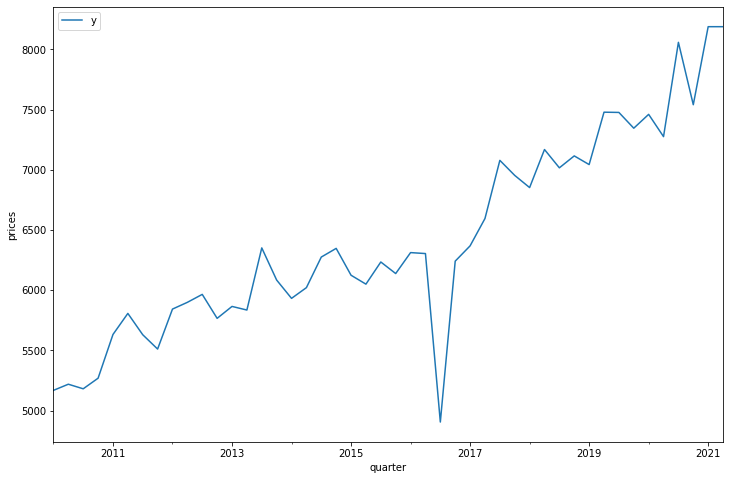

In [38]:
ax = df_00100.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel("prices")
ax.set_xlabel('quarter')

plt.show()

In [39]:
df_00100["ds"]

0    2010-01-01
1    2010-04-01
2    2010-07-01
3    2010-10-01
4    2011-01-01
5    2011-04-01
6    2011-07-01
7    2011-10-01
8    2012-01-01
9    2012-04-01
10   2012-07-01
11   2012-10-01
12   2013-01-01
13   2013-04-01
14   2013-07-01
15   2013-10-01
16   2014-01-01
17   2014-04-01
18   2014-07-01
19   2014-10-01
20   2015-01-01
21   2015-04-01
22   2015-07-01
23   2015-10-01
24   2016-01-01
25   2016-04-01
26   2016-07-01
27   2016-10-01
28   2017-01-01
29   2017-04-01
30   2017-07-01
31   2017-10-01
32   2018-01-01
33   2018-04-01
34   2018-07-01
35   2018-10-01
36   2019-01-01
37   2019-04-01
38   2019-07-01
39   2019-10-01
40   2020-01-01
41   2020-04-01
42   2020-07-01
43   2020-10-01
44   2021-01-01
45   2021-04-01
Name: ds, dtype: datetime64[ns]

In [40]:
# Setting up the model
prop = Prophet(interval_width=0.95)

In [41]:
train, test = df_00100[:-4], df_00100[-4:]

In [42]:
prop.fit(train)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.



Initial log joint probability = -52.7935
Iteration  1. Log joint probability =     81.067. Improved by 133.86.
Iteration  2. Log joint probability =    105.143. Improved by 24.076.
Iteration  3. Log joint probability =    113.938. Improved by 8.79479.
Iteration  4. Log joint probability =    114.836. Improved by 0.897786.
Iteration  5. Log joint probability =    115.207. Improved by 0.371794.
Iteration  6. Log joint probability =    115.298. Improved by 0.0902768.
Iteration  7. Log joint probability =    115.375. Improved by 0.0774581.
Iteration  8. Log joint probability =    115.429. Improved by 0.0543558.
Iteration  9. Log joint probability =    115.493. Improved by 0.0630725.
Iteration 10. Log joint probability =    115.541. Improved by 0.0485879.
Iteration 11. Log joint probability =    115.654. Improved by 0.112801.
Iteration 12. Log joint probability =    115.717. Improved by 0.0631605.
Iteration 13. Log joint probability =    115.798. Improved by 0.0806127.
Iteration 14. Log jo

0.0165587.
Iteration 15. Log joint probability =    116.093. Improved by 0.279238.
Iteration 16. Log joint probability =     116.12. Improved by 0.0261329.
Iteration 17. Log joint probability =    116.173. Improved by 0.0536227.
Iteration 18. Log joint probability =    116.205. Improved by 0.0318188.
Iteration 19. Log joint probability =    116.206. Improved by 0.00146504.
Iteration 20. Log joint probability =    116.254. Improved by 0.0474908.
Iteration 21. Log joint probability =      116.3. Improved by 0.0457964.
Iteration 22. Log joint probability =    116.322. Improved by 0.0226758.
Iteration 23. Log joint probability =    116.344. Improved by 0.0212269.
Iteration 24. Log joint probability =    116.353. Improved by 0.0090265.
Iteration 25. Log joint probability =    116.367. Improved by 0.0142965.
Iteration 26. Log joint probability =    116.373. Improved by 0.00603031.
Iteration 27. Log joint probability =    116.379. Improved by 0.00552954.
Iteration 28. Log joint probability = 

In [43]:
def make_dates_from_string(string):
    return date.datetime.strptime(string, '%d/%m/%Y')

old_dates = prop.make_future_dataframe(periods=0)
"""future_dates = ["1/7/2021", "1/10/2021", 
                "1/1/2022", "1/4/2022", "1/7/2022", "1/10/2022", 
                "1/1/2023", "1/4/2023", "1/7/2023", "1/10/2023",
                "1/1/2024", "1/4/2024"]"""
future_dates = ["1/7/2020", "1/10/2020", "1/1/2021", "1/4/2021"]
dates = [make_dates_from_string(d) for d in future_dates]
future_df = pd.DataFrame({"ds": dates})
future_dates_df = pd.concat([old_dates,future_df]).reset_index(drop=True)

In [44]:
future_df

,ds
0,2020-07-01
1,2020-10-01
2,2021-01-01
3,2021-04-01


In [45]:
forecast = prop.predict(future_dates_df)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2010-01-01,5251.066892,4721.409073,5743.261348
1,2010-04-01,5381.115332,4852.675346,5864.076348
2,2010-07-01,5489.532322,4982.650377,6047.501576
3,2010-10-01,5444.761393,4892.115525,5925.759347
4,2011-01-01,5493.245462,4992.493360,6021.591400


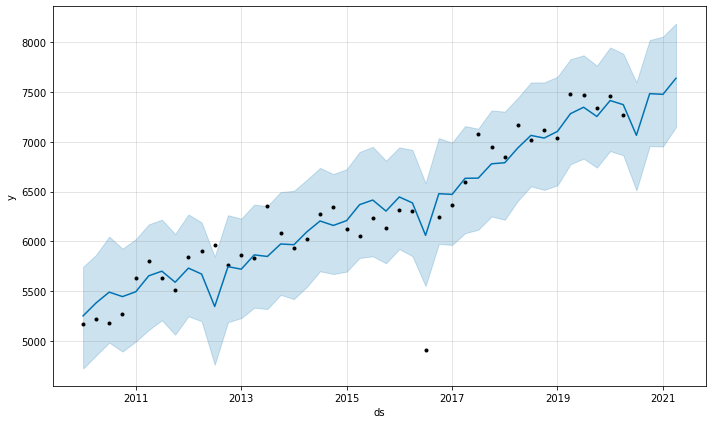

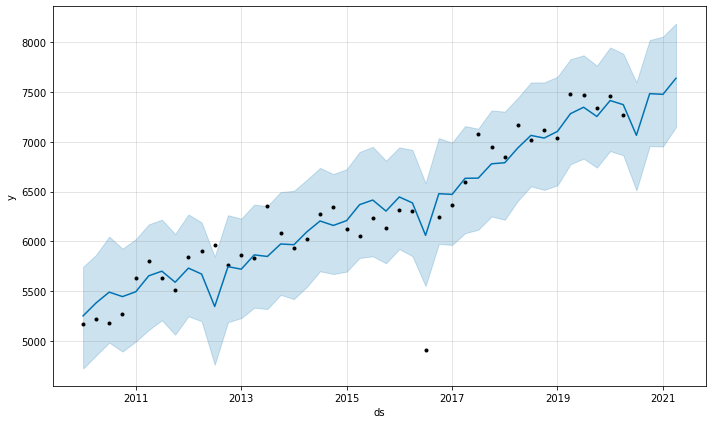

In [46]:
prop.plot(forecast, uncertainty=True)

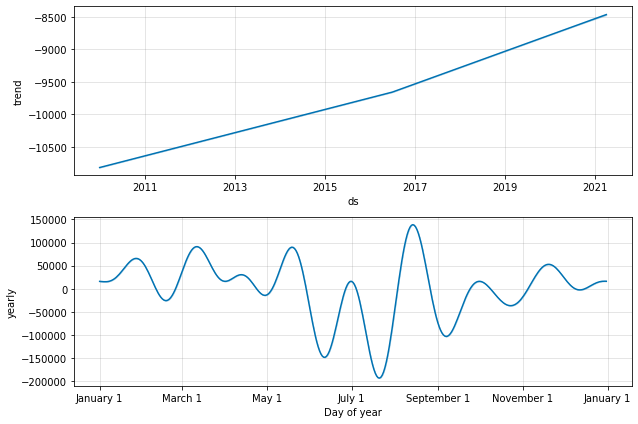

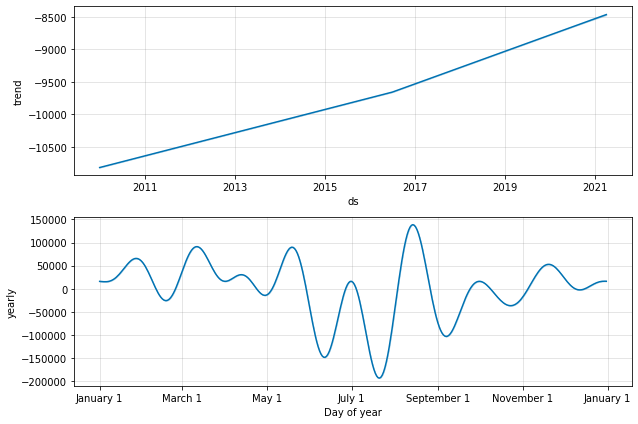

In [47]:
prop.plot_components(forecast)

RMSE
669.6206512352334


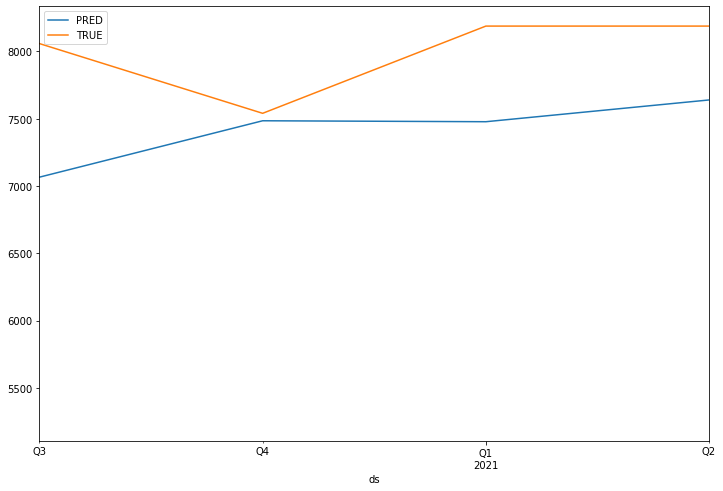

In [48]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

ax = forecast.plot(x='ds',y='yhat',legend=True,label='PRED',figsize=(12,8))
test.plot(x='ds',y='y',legend=True,label='TRUE', ax=ax, xlim=("2020-07-01", "2021-04-01"))
print("RMSE")
print(math.sqrt(mean_squared_error(test["y"], list(forecast["yhat"][-4:]))))

MAE: 212.277
RMSE: 321.539


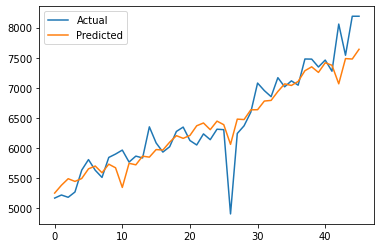

In [49]:
from sklearn.metrics import mean_absolute_error
import math

y_true = df_00100['y'].values
y_pred = forecast['yhat'][:46].values
mae = mean_absolute_error(y_true, y_pred)
rmse = math.sqrt(mean_squared_error(y_true, y_pred))

print('MAE: %.3f' % mae)
print('RMSE: %.3f' % rmse)

# plot expected vs actual
plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()

#### MAE and RMSE for each postal code (predict last four quarters)

In [50]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

def prophet_for_each_postalcodes(df, postal_codes, time="time"):

    mae_values = []
    rmse_values = []

    for pc in postal_codes:
        print(pc)
        pc_df = df[[pc, time]].rename(columns={pc:"y",time:"ds"})
        train, test = pc_df[:-4], pc_df[-4:]
        print(train)
        print(test)
        prop = Prophet(interval_width=0.95)
        prop.fit(train)
        forecast = prop.predict(test)
        mae = mean_absolute_error(test["y"], forecast["yhat"])
        rmse = math.sqrt(mean_squared_error(test["y"], forecast["yhat"]))
        mae_values.append(mae)
        rmse_values.append(rmse)

    data = pd.DataFrame({"postal code":postal_codes, "rmse":rmse_values, "mae":mae_values })
    return data, mae_values, rmse_values

data, mae_values, rmse_values = prophet_for_each_postalcodes(df, postal_codes)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


00100
         y         ds
0   5168.0 2010-01-01
1   5219.0 2010-04-01
2   5181.0 2010-07-01
3   5269.0 2010-10-01
4   5632.0 2011-01-01
5   5807.0 2011-04-01
6   5630.0 2011-07-01
7   5511.0 2011-10-01
8   5843.0 2012-01-01
9   5899.0 2012-04-01
10  5965.0 2012-07-01
11  5766.0 2012-10-01
12  5865.0 2013-01-01
13  5835.0 2013-04-01
14  6351.0 2013-07-01
15  6084.0 2013-10-01
16  5932.0 2014-01-01
17  6021.0 2014-04-01
18  6275.0 2014-07-01
19  6347.0 2014-10-01
20  6124.0 2015-01-01
21  6050.0 2015-04-01
22  6234.0 2015-07-01
23  6138.0 2015-10-01
24  6312.0 2016-01-01
25  6304.0 2016-04-01
26  4905.0 2016-07-01
27  6241.0 2016-10-01
28  6368.0 2017-01-01
29  6595.0 2017-04-01
30  7078.0 2017-07-01
31  6953.0 2017-10-01
32  6852.0 2018-01-01
33  7168.0 2018-04-01
34  7016.0 2018-07-01
35  7115.0 2018-10-01
36  7043.0 2019-01-01
37  7478.0 2019-04-01
38  7476.0 2019-07-01
39  7345.0 2019-10-01
40  7460.0 2020-01-01
41  7275.0 2020-04-01
         y         ds
42  8058.0 2020-07-01
43  

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


00260
         y         ds
0   4873.0 2010-01-01
1   5086.0 2010-04-01
2   4939.0 2010-07-01
3   4906.0 2010-10-01
4   5272.0 2011-01-01
5   5538.0 2011-04-01
6   5166.0 2011-07-01
7   5262.0 2011-10-01
8   5122.0 2012-01-01
9   5353.0 2012-04-01
10  5681.0 2012-07-01
11  5551.0 2012-10-01
12  5664.0 2013-01-01
13  5973.0 2013-04-01
14  5492.0 2013-07-01
15  5992.0 2013-10-01
16  5884.0 2014-01-01
17  5861.0 2014-04-01
18  5911.0 2014-07-01
19  5764.0 2014-10-01
20  6119.0 2015-01-01
21  5969.0 2015-04-01
22  5610.0 2015-07-01
23  5822.0 2015-10-01
24  5925.0 2016-01-01
25  5884.0 2016-04-01
26  5737.0 2016-07-01
27  6289.0 2016-10-01
28  6133.0 2017-01-01
29  6750.0 2017-04-01
30  6191.0 2017-07-01
31  6188.0 2017-10-01
32  6227.0 2018-01-01
33  6483.0 2018-04-01
34  6845.0 2018-07-01
35  6898.0 2018-10-01
36  6921.0 2019-01-01
37  6877.0 2019-04-01
38  6652.0 2019-07-01
39  6844.0 2019-10-01
40  7494.0 2020-01-01
41  7486.0 2020-04-01
         y         ds
42  7047.0 2020-07-01
43  

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


00360
         y         ds
0   2756.0 2010-01-01
1   3051.0 2010-04-01
2   2889.0 2010-07-01
3   3037.0 2010-10-01
4   3188.0 2011-01-01
5   3070.0 2011-04-01
6   2923.0 2011-07-01
7   3052.0 2011-10-01
8   3020.0 2012-01-01
9   3184.0 2012-04-01
10  3272.0 2012-07-01
11  3394.0 2012-10-01
12  3337.0 2013-01-01
13  3368.0 2013-04-01
14  3338.0 2013-07-01
15  3111.0 2013-10-01
16  3364.0 2014-01-01
17  3413.0 2014-04-01
18  3225.0 2014-07-01
19  3583.0 2014-10-01
20  3484.0 2015-01-01
21  3305.0 2015-04-01
22  3387.0 2015-07-01
23  3616.0 2015-10-01
24  3780.0 2016-01-01
25  3626.0 2016-04-01
26  4052.0 2016-07-01
27  4094.0 2016-10-01
28  3600.0 2017-01-01
29  3589.0 2017-04-01
30  4197.0 2017-07-01
31  4084.0 2017-10-01
32  4310.0 2018-01-01
33  4305.0 2018-04-01
34  4166.0 2018-07-01
35  4213.0 2018-10-01
36  4652.0 2019-01-01
37  4492.0 2019-04-01
38  4464.0 2019-07-01
39  4345.0 2019-10-01
40  4449.0 2020-01-01
41  4728.0 2020-04-01
         y         ds
42  4539.0 2020-07-01
43  

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


00500
         y         ds
0   4058.0 2010-01-01
1   4111.0 2010-04-01
2   4247.0 2010-07-01
3   4226.0 2010-10-01
4   4342.0 2011-01-01
5   4281.0 2011-04-01
6   4420.0 2011-07-01
7   4459.0 2011-10-01
8   4429.0 2012-01-01
9   4533.0 2012-04-01
10  4620.0 2012-07-01
11  4845.0 2012-10-01
12  4794.0 2013-01-01
13  4845.0 2013-04-01
14  5119.0 2013-07-01
15  5114.0 2013-10-01
16  5137.0 2014-01-01
17  5090.0 2014-04-01
18  5327.0 2014-07-01
19  4931.0 2014-10-01
20  5372.0 2015-01-01
21  5144.0 2015-04-01
22  5453.0 2015-07-01
23  5279.0 2015-10-01
24  5344.0 2016-01-01
25  5516.0 2016-04-01
26  5777.0 2016-07-01
27  5789.0 2016-10-01
28  5761.0 2017-01-01
29  5735.0 2017-04-01
30  5991.0 2017-07-01
31  5830.0 2017-10-01
32  5931.0 2018-01-01
33  6163.0 2018-04-01
34  6329.0 2018-07-01
35  6103.0 2018-10-01
36  6132.0 2019-01-01
37  6375.0 2019-04-01
38  6291.0 2019-07-01
39  6406.0 2019-10-01
40  6827.0 2020-01-01
41  7010.0 2020-04-01
         y         ds
42  6799.0 2020-07-01
43  

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


00520
         y         ds
0   3317.0 2010-01-01
1   3706.0 2010-04-01
2   3672.0 2010-07-01
3   3681.0 2010-10-01
4   3654.0 2011-01-01
5   3864.0 2011-04-01
6   4285.0 2011-07-01
7   3898.0 2011-10-01
8   3854.0 2012-01-01
9   4057.0 2012-04-01
10  4045.0 2012-07-01
11  4280.0 2012-10-01
12  4514.0 2013-01-01
13  4402.0 2013-04-01
14  4637.0 2013-07-01
15  4306.0 2013-10-01
16  4092.0 2014-01-01
17  4367.0 2014-04-01
18  4680.0 2014-07-01
19  4316.0 2014-10-01
20  4436.0 2015-01-01
21  4822.0 2015-04-01
22  5010.0 2015-07-01
23  4868.0 2015-10-01
24  4872.0 2016-01-01
25  4826.0 2016-04-01
26  4584.0 2016-07-01
27  4819.0 2016-10-01
28  5026.0 2017-01-01
29  5060.0 2017-04-01
30  5165.0 2017-07-01
31  5102.0 2017-10-01
32  5388.0 2018-01-01
33  5705.0 2018-04-01
34  5664.0 2018-07-01
35  5595.0 2018-10-01
36  4922.0 2019-01-01
37  5206.0 2019-04-01
38  5331.0 2019-07-01
39  5434.0 2019-10-01
40  5435.0 2020-01-01
41  5711.0 2020-04-01
         y         ds
42  5638.0 2020-07-01
43  

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


00730
         y         ds
0   3006.0 2010-01-01
1   3070.0 2010-04-01
2   2944.0 2010-07-01
3   3046.0 2010-10-01
4   3061.0 2011-01-01
5   2840.0 2011-04-01
6   3189.0 2011-07-01
7   2969.0 2011-10-01
8   3147.0 2012-01-01
9   3054.0 2012-04-01
10  2966.0 2012-07-01
11  3075.0 2012-10-01
12  3207.0 2013-01-01
13  3183.0 2013-04-01
14  3559.0 2013-07-01
15  3306.0 2013-10-01
16  3219.0 2014-01-01
17  3384.0 2014-04-01
18  3250.0 2014-07-01
19  3696.0 2014-10-01
20  3349.0 2015-01-01
21  3383.0 2015-04-01
22  3265.0 2015-07-01
23  3213.0 2015-10-01
24  3681.0 2016-01-01
25  2767.0 2016-04-01
26  3209.0 2016-07-01
27  2944.0 2016-10-01
28  3473.0 2017-01-01
29  2889.0 2017-04-01
30  3156.0 2017-07-01
31  3414.0 2017-10-01
32  3297.0 2018-01-01
33  3325.0 2018-04-01
34  3208.0 2018-07-01
35  3334.0 2018-10-01
36  3374.0 2019-01-01
37  3390.0 2019-04-01
38  3419.0 2019-07-01
39  3072.0 2019-10-01
40  3747.0 2020-01-01
41  4008.0 2020-04-01
         y         ds
42  3581.0 2020-07-01
43  

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


00820
         y         ds
0   2652.0 2010-01-01
1   2561.0 2010-04-01
2   2632.0 2010-07-01
3   2580.0 2010-10-01
4   2793.0 2011-01-01
5   2717.0 2011-04-01
6   2723.0 2011-07-01
7   2663.0 2011-10-01
8   2765.0 2012-01-01
9   2844.0 2012-04-01
10  2920.0 2012-07-01
11  2850.0 2012-10-01
12  2853.0 2013-01-01
13  2916.0 2013-04-01
14  2845.0 2013-07-01
15  2812.0 2013-10-01
16  2865.0 2014-01-01
17  2826.0 2014-04-01
18  3080.0 2014-07-01
19  2863.0 2014-10-01
20  3073.0 2015-01-01
21  3083.0 2015-04-01
22  2919.0 2015-07-01
23  2724.0 2015-10-01
24  3081.0 2016-01-01
25  3145.0 2016-04-01
26  2934.0 2016-07-01
27  2876.0 2016-10-01
28  3270.0 2017-01-01
29  3115.0 2017-04-01
30  3576.0 2017-07-01
31  3124.0 2017-10-01
32  3411.0 2018-01-01
33  3443.0 2018-04-01
34  3596.0 2018-07-01
35  3544.0 2018-10-01
36  3487.0 2019-01-01
37  3741.0 2019-04-01
38  3794.0 2019-07-01
39  3479.0 2019-10-01
40  3787.0 2020-01-01
41  3709.0 2020-04-01
         y         ds
42  3930.0 2020-07-01
43  

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


01280
         y         ds
0   2098.0 2010-01-01
1   2045.0 2010-04-01
2   2210.0 2010-07-01
3   2359.0 2010-10-01
4   2165.0 2011-01-01
5   2227.0 2011-04-01
6   2123.0 2011-07-01
7   2454.0 2011-10-01
8   2358.0 2012-01-01
9   2161.0 2012-04-01
10  2323.0 2012-07-01
11  2284.0 2012-10-01
12  2202.0 2013-01-01
13  2283.0 2013-04-01
14  2329.0 2013-07-01
15  2368.0 2013-10-01
16  2484.0 2014-01-01
17  2157.0 2014-04-01
18  2073.0 2014-07-01
19  2319.0 2014-10-01
20  2407.0 2015-01-01
21  2033.0 2015-04-01
22  2336.0 2015-07-01
23  2168.0 2015-10-01
24  1977.0 2016-01-01
25  2254.0 2016-04-01
26  2239.0 2016-07-01
27  2215.0 2016-10-01
28  2067.0 2017-01-01
29  2268.0 2017-04-01
30  2187.0 2017-07-01
31  2101.0 2017-10-01
32  2290.0 2018-01-01
33  2088.0 2018-04-01
34  2289.0 2018-07-01
35  2161.0 2018-10-01
36  2015.0 2019-01-01
37  2068.0 2019-04-01
38  2301.0 2019-07-01
39  2116.0 2019-10-01
40  1953.0 2020-01-01
41  2291.0 2020-04-01
         y         ds
42  2321.0 2020-07-01
43  

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


01300
         y         ds
0   2616.0 2010-01-01
1   2688.0 2010-04-01
2   2814.0 2010-07-01
3   2727.0 2010-10-01
4   2734.0 2011-01-01
5   2869.0 2011-04-01
6   2846.0 2011-07-01
7   2667.0 2011-10-01
8   3020.0 2012-01-01
9   2933.0 2012-04-01
10  2935.0 2012-07-01
11  3088.0 2012-10-01
12  2844.0 2013-01-01
13  2931.0 2013-04-01
14  3078.0 2013-07-01
15  3013.0 2013-10-01
16  2993.0 2014-01-01
17  3177.0 2014-04-01
18  3091.0 2014-07-01
19  2963.0 2014-10-01
20  3138.0 2015-01-01
21  3218.0 2015-04-01
22  3166.0 2015-07-01
23  2939.0 2015-10-01
24  2864.0 2016-01-01
25  2948.0 2016-04-01
26  3004.0 2016-07-01
27  3212.0 2016-10-01
28  3032.0 2017-01-01
29  3225.0 2017-04-01
30  3251.0 2017-07-01
31  3252.0 2017-10-01
32  3403.0 2018-01-01
33  3242.0 2018-04-01
34  3583.0 2018-07-01
35  3276.0 2018-10-01
36  3465.0 2019-01-01
37  3378.0 2019-04-01
38  3314.0 2019-07-01
39  3464.0 2019-10-01
40  3739.0 2020-01-01
41  3883.0 2020-04-01
         y         ds
42  3690.0 2020-07-01
43  

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


01450
         y         ds
0   1809.0 2010-01-01
1   2063.0 2010-04-01
2   2080.0 2010-07-01
3   2052.0 2010-10-01
4   2200.0 2011-01-01
5   2277.0 2011-04-01
6   2362.0 2011-07-01
7   2207.0 2011-10-01
8   2332.0 2012-01-01
9   2306.0 2012-04-01
10  2441.0 2012-07-01
11  2270.0 2012-10-01
12  2276.0 2013-01-01
13  2345.0 2013-04-01
14  2321.0 2013-07-01
15  2420.0 2013-10-01
16  2252.0 2014-01-01
17  2362.0 2014-04-01
18  2252.0 2014-07-01
19  2139.0 2014-10-01
20  2501.0 2015-01-01
21  2341.0 2015-04-01
22  2536.0 2015-07-01
23  2489.0 2015-10-01
24  2410.0 2016-01-01
25  2339.0 2016-04-01
26  2361.0 2016-07-01
27  1968.0 2016-10-01
28  2366.0 2017-01-01
29  2205.0 2017-04-01
30  2404.0 2017-07-01
31  2367.0 2017-10-01
32  2416.0 2018-01-01
33  2299.0 2018-04-01
34  2659.0 2018-07-01
35  2281.0 2018-10-01
36  2570.0 2019-01-01
37  2343.0 2019-04-01
38  2440.0 2019-07-01
39  2381.0 2019-10-01
40  2356.0 2020-01-01
41  2609.0 2020-04-01
         y         ds
42  2230.0 2020-07-01
43  

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


02200
         y         ds
0   3285.0 2010-01-01
1   3266.0 2010-04-01
2   3515.0 2010-07-01
3   3633.0 2010-10-01
4   3217.0 2011-01-01
5   3530.0 2011-04-01
6   3495.0 2011-07-01
7   3462.0 2011-10-01
8   3834.0 2012-01-01
9   3827.0 2012-04-01
10  3763.0 2012-07-01
11  3971.0 2012-10-01
12  3925.0 2013-01-01
13  3464.0 2013-04-01
14  3739.0 2013-07-01
15  4231.0 2013-10-01
16  4091.0 2014-01-01
17  4037.0 2014-04-01
18  4085.0 2014-07-01
19  4203.0 2014-10-01
20  3812.0 2015-01-01
21  4400.0 2015-04-01
22  4095.0 2015-07-01
23  3613.0 2015-10-01
24  4397.0 2016-01-01
25  4184.0 2016-04-01
26  3869.0 2016-07-01
27  4120.0 2016-10-01
28  4091.0 2017-01-01
29  4482.0 2017-04-01
30  4351.0 2017-07-01
31  4335.0 2017-10-01
32  4218.0 2018-01-01
33  4291.0 2018-04-01
34  4741.0 2018-07-01
35  4330.0 2018-10-01
36  4684.0 2019-01-01
37  4506.0 2019-04-01
38  4456.0 2019-07-01
39  4674.0 2019-10-01
40  4729.0 2020-01-01
41  4837.0 2020-04-01
         y         ds
42  4837.0 2020-07-01
43  

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


02210
         y         ds
0   2727.0 2010-01-01
1   2646.0 2010-04-01
2   2652.0 2010-07-01
3   2779.0 2010-10-01
4   2718.0 2011-01-01
5   2925.0 2011-04-01
6   2865.0 2011-07-01
7   2750.0 2011-10-01
8   2862.0 2012-01-01
9   2836.0 2012-04-01
10  2885.0 2012-07-01
11  2762.0 2012-10-01
12  2962.0 2013-01-01
13  2912.0 2013-04-01
14  3117.0 2013-07-01
15  2793.0 2013-10-01
16  2937.0 2014-01-01
17  2794.0 2014-04-01
18  2825.0 2014-07-01
19  2784.0 2014-10-01
20  3031.0 2015-01-01
21  2723.0 2015-04-01
22  2911.0 2015-07-01
23  2918.0 2015-10-01
24  2775.0 2016-01-01
25  2843.0 2016-04-01
26  2991.0 2016-07-01
27  3056.0 2016-10-01
28  2873.0 2017-01-01
29  2894.0 2017-04-01
30  3005.0 2017-07-01
31  3094.0 2017-10-01
32  2976.0 2018-01-01
33  3043.0 2018-04-01
34  3106.0 2018-07-01
35  3111.0 2018-10-01
36  3114.0 2019-01-01
37  3135.0 2019-04-01
38  3065.0 2019-07-01
39  3010.0 2019-10-01
40  3078.0 2020-01-01
41  3292.0 2020-04-01
         y         ds
42  3328.0 2020-07-01
43  

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


02320
         y         ds
0   2616.0 2010-01-01
1   2691.0 2010-04-01
2   2588.0 2010-07-01
3   2867.0 2010-10-01
4   2633.0 2011-01-01
5   2844.0 2011-04-01
6   2944.0 2011-07-01
7   2805.0 2011-10-01
8   2878.0 2012-01-01
9   3029.0 2012-04-01
10  2889.0 2012-07-01
11  2817.0 2012-10-01
12  2836.0 2013-01-01
13  3077.0 2013-04-01
14  2830.0 2013-07-01
15  3080.0 2013-10-01
16  2641.0 2014-01-01
17  3013.0 2014-04-01
18  2746.0 2014-07-01
19  2995.0 2014-10-01
20  2872.0 2015-01-01
21  2975.0 2015-04-01
22  2884.0 2015-07-01
23  2968.0 2015-10-01
24  2981.0 2016-01-01
25  2872.0 2016-04-01
26  2877.0 2016-07-01
27  2772.0 2016-10-01
28  3151.0 2017-01-01
29  3016.0 2017-04-01
30  3186.0 2017-07-01
31  2814.0 2017-10-01
32  2934.0 2018-01-01
33  2911.0 2018-04-01
34  2954.0 2018-07-01
35  3032.0 2018-10-01
36  3155.0 2019-01-01
37  3069.0 2019-04-01
38  3182.0 2019-07-01
39  2958.0 2019-10-01
40  3060.0 2020-01-01
41  3268.0 2020-04-01
         y         ds
42  2999.0 2020-07-01
43  

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


02400
         y         ds
0   2329.0 2010-01-01
1   2086.0 2010-04-01
2   2105.0 2010-07-01
3   2132.0 2010-10-01
4   2154.0 2011-01-01
5   2201.0 2011-04-01
6   2316.0 2011-07-01
7   1910.0 2011-10-01
8   2043.0 2012-01-01
9   2454.0 2012-04-01
10  2298.0 2012-07-01
11  2238.0 2012-10-01
12  2495.0 2013-01-01
13  2107.0 2013-04-01
14  2594.0 2013-07-01
15  2304.0 2013-10-01
16  2293.0 2014-01-01
17  2234.0 2014-04-01
18  2543.0 2014-07-01
19  2332.0 2014-10-01
20  2399.0 2015-01-01
21  2288.0 2015-04-01
22  2320.0 2015-07-01
23  2129.0 2015-10-01
24  2392.0 2016-01-01
25  2399.0 2016-04-01
26  2155.0 2016-07-01
27  2167.0 2016-10-01
28  2304.0 2017-01-01
29  2512.0 2017-04-01
30  2313.0 2017-07-01
31  2389.0 2017-10-01
32  2553.0 2018-01-01
33  1986.0 2018-04-01
34  2586.0 2018-07-01
35  2441.0 2018-10-01
36  1882.0 2019-01-01
37  2195.0 2019-04-01
38  1980.0 2019-07-01
39  2655.0 2019-10-01
40  2324.0 2020-01-01
41  2333.0 2020-04-01
         y         ds
42  2275.0 2020-07-01
43  

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


02760
         y         ds
0   2384.0 2010-01-01
1   2370.0 2010-04-01
2   2595.0 2010-07-01
3   2505.0 2010-10-01
4   2583.0 2011-01-01
5   2432.0 2011-04-01
6   2553.0 2011-07-01
7   2538.0 2011-10-01
8   2618.0 2012-01-01
9   2663.0 2012-04-01
10  2800.0 2012-07-01
11  2680.0 2012-10-01
12  2696.0 2013-01-01
13  2378.0 2013-04-01
14  2468.0 2013-07-01
15  2607.0 2013-10-01
16  2855.0 2014-01-01
17  2789.0 2014-04-01
18  2556.0 2014-07-01
19  2521.0 2014-10-01
20  2497.0 2015-01-01
21  2650.0 2015-04-01
22  2514.0 2015-07-01
23  2546.0 2015-10-01
24  2483.0 2016-01-01
25  2753.0 2016-04-01
26  2640.0 2016-07-01
27  2875.0 2016-10-01
28  2753.0 2017-01-01
29  2780.0 2017-04-01
30  2626.0 2017-07-01
31  2801.0 2017-10-01
32  2767.0 2018-01-01
33  2706.0 2018-04-01
34  2388.0 2018-07-01
35  2710.0 2018-10-01
36  2545.0 2019-01-01
37  2594.0 2019-04-01
38  2500.0 2019-07-01
39  2612.0 2019-10-01
40  2612.0 2020-01-01
41  2931.0 2020-04-01
         y         ds
42  3034.0 2020-07-01
43  

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


03100
         y         ds
0   1778.0 2010-01-01
1   1879.0 2010-04-01
2   2028.0 2010-07-01
3   1685.0 2010-10-01
4   1836.0 2011-01-01
5   1832.0 2011-04-01
6   2037.0 2011-07-01
7   2255.0 2011-10-01
8   2031.0 2012-01-01
9   1894.0 2012-04-01
10  2159.0 2012-07-01
11  2269.0 2012-10-01
12  2093.0 2013-01-01
13  2136.0 2013-04-01
14  2247.0 2013-07-01
15  2244.0 2013-10-01
16  2149.0 2014-01-01
17  2122.0 2014-04-01
18  1990.0 2014-07-01
19  2102.0 2014-10-01
20  2236.0 2015-01-01
21  2185.0 2015-04-01
22  2264.0 2015-07-01
23  1613.0 2015-10-01
24  2046.0 2016-01-01
25  2326.0 2016-04-01
26  2226.0 2016-07-01
27  2224.0 2016-10-01
28  2040.0 2017-01-01
29  1946.0 2017-04-01
30  2172.0 2017-07-01
31  2259.0 2017-10-01
32  2196.0 2018-01-01
33  2199.0 2018-04-01
34  2153.0 2018-07-01
35  2237.0 2018-10-01
36  2298.0 2019-01-01
37  2139.0 2019-04-01
38  1971.0 2019-07-01
39  1753.0 2019-10-01
40  2107.0 2020-01-01
41  1792.0 2020-04-01
         y         ds
42  2015.0 2020-07-01
43  

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


04410
         y         ds
0   2072.0 2010-01-01
1   2089.0 2010-04-01
2   2392.0 2010-07-01
3   2319.0 2010-10-01
4   2249.0 2011-01-01
5   2069.0 2011-04-01
6   2176.0 2011-07-01
7   2227.0 2011-10-01
8   2423.0 2012-01-01
9   2298.0 2012-04-01
10  2569.0 2012-07-01
11  2319.0 2012-10-01
12  2505.0 2013-01-01
13  2239.0 2013-04-01
14  2527.0 2013-07-01
15  2330.0 2013-10-01
16  2441.0 2014-01-01
17  2420.0 2014-04-01
18  2210.0 2014-07-01
19  2594.0 2014-10-01
20  2430.0 2015-01-01
21  2263.0 2015-04-01
22  2730.0 2015-07-01
23  2444.0 2015-10-01
24  2335.0 2016-01-01
25  2195.0 2016-04-01
26  2052.0 2016-07-01
27  2097.0 2016-10-01
28  2109.0 2017-01-01
29  2696.0 2017-04-01
30  2412.0 2017-07-01
31  2258.0 2017-10-01
32  2255.0 2018-01-01
33  2373.0 2018-04-01
34  2480.0 2018-07-01
35  2139.0 2018-10-01
36  2284.0 2019-01-01
37  2245.0 2019-04-01
38  2637.0 2019-07-01
39  2200.0 2019-10-01
40  2362.0 2020-01-01
41  2598.0 2020-04-01
         y         ds
42  2231.0 2020-07-01
43  

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


06100
         y         ds
0   2278.0 2010-01-01
1   2594.0 2010-04-01
2   2576.0 2010-07-01
3   2427.0 2010-10-01
4   2747.0 2011-01-01
5   2569.0 2011-04-01
6   2660.0 2011-07-01
7   2571.0 2011-10-01
8   2611.0 2012-01-01
9   2740.0 2012-04-01
10  2754.0 2012-07-01
11  2689.0 2012-10-01
12  2709.0 2013-01-01
13  2588.0 2013-04-01
14  2809.0 2013-07-01
15  2800.0 2013-10-01
16  2853.0 2014-01-01
17  2832.0 2014-04-01
18  2770.0 2014-07-01
19  2550.0 2014-10-01
20  2994.0 2015-01-01
21  2587.0 2015-04-01
22  2738.0 2015-07-01
23  2962.0 2015-10-01
24  2912.0 2016-01-01
25  2834.0 2016-04-01
26  2722.0 2016-07-01
27  2813.0 2016-10-01
28  2854.0 2017-01-01
29  2788.0 2017-04-01
30  2805.0 2017-07-01
31  2524.0 2017-10-01
32  2933.0 2018-01-01
33  2859.0 2018-04-01
34  2863.0 2018-07-01
35  2851.0 2018-10-01
36  2877.0 2019-01-01
37  2989.0 2019-04-01
38  2793.0 2019-07-01
39  2688.0 2019-10-01
40  2900.0 2020-01-01
41  2932.0 2020-04-01
         y         ds
42  2779.0 2020-07-01
43  

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


20100
         y         ds
0   2420.0 2010-01-01
1   2472.0 2010-04-01
2   2448.0 2010-07-01
3   2438.0 2010-10-01
4   2569.0 2011-01-01
5   2522.0 2011-04-01
6   2540.0 2011-07-01
7   2490.0 2011-10-01
8   2491.0 2012-01-01
9   2545.0 2012-04-01
10  2594.0 2012-07-01
11  2646.0 2012-10-01
12  2718.0 2013-01-01
13  2728.0 2013-04-01
14  2702.0 2013-07-01
15  2640.0 2013-10-01
16  2692.0 2014-01-01
17  2890.0 2014-04-01
18  2718.0 2014-07-01
19  2626.0 2014-10-01
20  2755.0 2015-01-01
21  2760.0 2015-04-01
22  2807.0 2015-07-01
23  2835.0 2015-10-01
24  2927.0 2016-01-01
25  2984.0 2016-04-01
26  3028.0 2016-07-01
27  3072.0 2016-10-01
28  3015.0 2017-01-01
29  3100.0 2017-04-01
30  3173.0 2017-07-01
31  3181.0 2017-10-01
32  3177.0 2018-01-01
33  3131.0 2018-04-01
34  3251.0 2018-07-01
35  3244.0 2018-10-01
36  3435.0 2019-01-01
37  3459.0 2019-04-01
38  3437.0 2019-07-01
39  3481.0 2019-10-01
40  3566.0 2020-01-01
41  3576.0 2020-04-01
         y         ds
42  3653.0 2020-07-01
43  

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


20320
         y         ds
0   1622.0 2010-01-01
1   1643.0 2010-04-01
2   1651.0 2010-07-01
3   1608.0 2010-10-01
4   1587.0 2011-01-01
5   1640.0 2011-04-01
6   1596.0 2011-07-01
7   1600.0 2011-10-01
8   1659.0 2012-01-01
9   1707.0 2012-04-01
10  1650.0 2012-07-01
11  1676.0 2012-10-01
12  1710.0 2013-01-01
13  1679.0 2013-04-01
14  1682.0 2013-07-01
15  1730.0 2013-10-01
16  1719.0 2014-01-01
17  1723.0 2014-04-01
18  1737.0 2014-07-01
19  1604.0 2014-10-01
20  1674.0 2015-01-01
21  1733.0 2015-04-01
22  1646.0 2015-07-01
23  1701.0 2015-10-01
24  1659.0 2016-01-01
25  1678.0 2016-04-01
26  1743.0 2016-07-01
27  1717.0 2016-10-01
28  1774.0 2017-01-01
29  1748.0 2017-04-01
30  1668.0 2017-07-01
31  1737.0 2017-10-01
32  1829.0 2018-01-01
33  1781.0 2018-04-01
34  1925.0 2018-07-01
35  1838.0 2018-10-01
36  1768.0 2019-01-01
37  1773.0 2019-04-01
38  1779.0 2019-07-01
39  1729.0 2019-10-01
40  1865.0 2020-01-01
41  1743.0 2020-04-01
         y         ds
42  1775.0 2020-07-01
43  

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


20540
         y         ds
0   1660.0 2010-01-01
1   1589.0 2010-04-01
2   1680.0 2010-07-01
3   1513.0 2010-10-01
4   1615.0 2011-01-01
5   1593.0 2011-04-01
6   1637.0 2011-07-01
7   1651.0 2011-10-01
8   1712.0 2012-01-01
9   1729.0 2012-04-01
10  1743.0 2012-07-01
11  1671.0 2012-10-01
12  1682.0 2013-01-01
13  1793.0 2013-04-01
14  1741.0 2013-07-01
15  1714.0 2013-10-01
16  1694.0 2014-01-01
17  1819.0 2014-04-01
18  1773.0 2014-07-01
19  1711.0 2014-10-01
20  1810.0 2015-01-01
21  1794.0 2015-04-01
22  1639.0 2015-07-01
23  1690.0 2015-10-01
24  1806.0 2016-01-01
25  1744.0 2016-04-01
26  1744.0 2016-07-01
27  1831.0 2016-10-01
28  1810.0 2017-01-01
29  1895.0 2017-04-01
30  1761.0 2017-07-01
31  1718.0 2017-10-01
32  1830.0 2018-01-01
33  1932.0 2018-04-01
34  1976.0 2018-07-01
35  2022.0 2018-10-01
36  1950.0 2019-01-01
37  1927.0 2019-04-01
38  2215.0 2019-07-01
39  2087.0 2019-10-01
40  2039.0 2020-01-01
41  2267.0 2020-04-01
         y         ds
42  2363.0 2020-07-01
43  

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


20780
         y         ds
0   1510.0 2010-01-01
1   1508.0 2010-04-01
2   1789.0 2010-07-01
3   1740.0 2010-10-01
4   1510.0 2011-01-01
5   1688.0 2011-04-01
6   1497.0 2011-07-01
7   1406.0 2011-10-01
8   1520.0 2012-01-01
9   1460.0 2012-04-01
10  1525.0 2012-07-01
11  1399.0 2012-10-01
12  1615.0 2013-01-01
13  1634.0 2013-04-01
14  1637.0 2013-07-01
15  1396.0 2013-10-01
16  1419.0 2014-01-01
17  1791.0 2014-04-01
18  1564.0 2014-07-01
19  1626.0 2014-10-01
20  1755.0 2015-01-01
21  1636.0 2015-04-01
22  1684.0 2015-07-01
23  1847.0 2015-10-01
24  1664.0 2016-01-01
25  1695.0 2016-04-01
26  1678.0 2016-07-01
27  1692.0 2016-10-01
28  1679.0 2017-01-01
29  1632.0 2017-04-01
30  1629.0 2017-07-01
31  1768.0 2017-10-01
32  1608.0 2018-01-01
33  1518.0 2018-04-01
34  1638.0 2018-07-01
35  1737.0 2018-10-01
36  1772.0 2019-01-01
37  1771.0 2019-04-01
38  1808.0 2019-07-01
39  1878.0 2019-10-01
40  1540.0 2020-01-01
41  2158.0 2020-04-01
         y         ds
42  1896.0 2020-07-01
43  

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


20810
         y         ds
0   2291.0 2010-01-01
1   2362.0 2010-04-01
2   2414.0 2010-07-01
3   2434.0 2010-10-01
4   2477.0 2011-01-01
5   2400.0 2011-04-01
6   2529.0 2011-07-01
7   2284.0 2011-10-01
8   2541.0 2012-01-01
9   2413.0 2012-04-01
10  2546.0 2012-07-01
11  2401.0 2012-10-01
12  2443.0 2013-01-01
13  2663.0 2013-04-01
14  2609.0 2013-07-01
15  2463.0 2013-10-01
16  2594.0 2014-01-01
17  2616.0 2014-04-01
18  2544.0 2014-07-01
19  2571.0 2014-10-01
20  2740.0 2015-01-01
21  2634.0 2015-04-01
22  2572.0 2015-07-01
23  2752.0 2015-10-01
24  2890.0 2016-01-01
25  2855.0 2016-04-01
26  2634.0 2016-07-01
27  2932.0 2016-10-01
28  2446.0 2017-01-01
29  2843.0 2017-04-01
30  2943.0 2017-07-01
31  3050.0 2017-10-01
32  3108.0 2018-01-01
33  3157.0 2018-04-01
34  3207.0 2018-07-01
35  3172.0 2018-10-01
36  3406.0 2019-01-01
37  3026.0 2019-04-01
38  3129.0 2019-07-01
39  3186.0 2019-10-01
40  3243.0 2020-01-01
41  3275.0 2020-04-01
         y         ds
42  3201.0 2020-07-01
43  

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


21200
         y         ds
0   1450.0 2010-01-01
1   1600.0 2010-04-01
2   1518.0 2010-07-01
3   1522.0 2010-10-01
4   1556.0 2011-01-01
5   1470.0 2011-04-01
6   1504.0 2011-07-01
7   1467.0 2011-10-01
8   1404.0 2012-01-01
9   1486.0 2012-04-01
10  1526.0 2012-07-01
11  1499.0 2012-10-01
12  1495.0 2013-01-01
13  1494.0 2013-04-01
14  1530.0 2013-07-01
15  1523.0 2013-10-01
16  1492.0 2014-01-01
17  1544.0 2014-04-01
18  1424.0 2014-07-01
19  1540.0 2014-10-01
20  1455.0 2015-01-01
21  1439.0 2015-04-01
22  1490.0 2015-07-01
23  1463.0 2015-10-01
24  1503.0 2016-01-01
25  1427.0 2016-04-01
26  1540.0 2016-07-01
27  1452.0 2016-10-01
28  1589.0 2017-01-01
29  1495.0 2017-04-01
30  1571.0 2017-07-01
31  1444.0 2017-10-01
32  1424.0 2018-01-01
33  1610.0 2018-04-01
34  1612.0 2018-07-01
35  1561.0 2018-10-01
36  1475.0 2019-01-01
37  1630.0 2019-04-01
38  1527.0 2019-07-01
39  1550.0 2019-10-01
40  1650.0 2020-01-01
41  1654.0 2020-04-01
         y         ds
42  1719.0 2020-07-01
43  

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


23500
         y         ds
0    874.0 2010-01-01
1    822.0 2010-04-01
2    838.0 2010-07-01
3    746.0 2010-10-01
4    895.0 2011-01-01
5    934.0 2011-04-01
6    892.0 2011-07-01
7    874.0 2011-10-01
8    923.0 2012-01-01
9   1067.0 2012-04-01
10  1068.0 2012-07-01
11   995.0 2012-10-01
12  1076.0 2013-01-01
13  1087.0 2013-04-01
14   971.0 2013-07-01
15  1047.0 2013-10-01
16  1038.0 2014-01-01
17  1043.0 2014-04-01
18  1090.0 2014-07-01
19  1026.0 2014-10-01
20  1083.0 2015-01-01
21  1127.0 2015-04-01
22  1005.0 2015-07-01
23  1043.0 2015-10-01
24  1030.0 2016-01-01
25   987.0 2016-04-01
26  1109.0 2016-07-01
27  1017.0 2016-10-01
28  1083.0 2017-01-01
29  1240.0 2017-04-01
30  1259.0 2017-07-01
31  1166.0 2017-10-01
32  1202.0 2018-01-01
33  1324.0 2018-04-01
34  1287.0 2018-07-01
35  1143.0 2018-10-01
36  1222.0 2019-01-01
37  1172.0 2019-04-01
38  1138.0 2019-07-01
39  1226.0 2019-10-01
40  1086.0 2020-01-01
41  1063.0 2020-04-01
         y         ds
42  1141.0 2020-07-01
43  

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


24100
         y         ds
0   1507.0 2010-01-01
1   1438.0 2010-04-01
2   1460.0 2010-07-01
3   1496.0 2010-10-01
4   1512.0 2011-01-01
5   1554.0 2011-04-01
6   1577.0 2011-07-01
7   1318.0 2011-10-01
8   1668.0 2012-01-01
9   1520.0 2012-04-01
10  1626.0 2012-07-01
11  1262.0 2012-10-01
12  1339.0 2013-01-01
13  1458.0 2013-04-01
14  1246.0 2013-07-01
15  1365.0 2013-10-01
16  1443.0 2014-01-01
17  1367.0 2014-04-01
18  1517.0 2014-07-01
19  1294.0 2014-10-01
20  1506.0 2015-01-01
21  1346.0 2015-04-01
22  1437.0 2015-07-01
23  1271.0 2015-10-01
24  1560.0 2016-01-01
25  1437.0 2016-04-01
26  1359.0 2016-07-01
27  1318.0 2016-10-01
28  1416.0 2017-01-01
29  1389.0 2017-04-01
30  1520.0 2017-07-01
31  1323.0 2017-10-01
32  1504.0 2018-01-01
33  1516.0 2018-04-01
34  1351.0 2018-07-01
35  1250.0 2018-10-01
36  1468.0 2019-01-01
37  1464.0 2019-04-01
38  1617.0 2019-07-01
39  1386.0 2019-10-01
40  1475.0 2020-01-01
41  1459.0 2020-04-01
         y         ds
42  1617.0 2020-07-01
43  

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


26100
         y         ds
0   1314.0 2010-01-01
1   1422.0 2010-04-01
2   1428.0 2010-07-01
3   1427.0 2010-10-01
4   1556.0 2011-01-01
5   1506.0 2011-04-01
6   1590.0 2011-07-01
7   1521.0 2011-10-01
8   1591.0 2012-01-01
9   1548.0 2012-04-01
10  1558.0 2012-07-01
11  1207.0 2012-10-01
12  1469.0 2013-01-01
13  1504.0 2013-04-01
14  1537.0 2013-07-01
15  1476.0 2013-10-01
16  1483.0 2014-01-01
17  1339.0 2014-04-01
18  1548.0 2014-07-01
19  1540.0 2014-10-01
20  1364.0 2015-01-01
21  1473.0 2015-04-01
22  1495.0 2015-07-01
23  1293.0 2015-10-01
24  1109.0 2016-01-01
25  1089.0 2016-04-01
26  1510.0 2016-07-01
27  1422.0 2016-10-01
28  1219.0 2017-01-01
29  1352.0 2017-04-01
30  1442.0 2017-07-01
31  1513.0 2017-10-01
32  1539.0 2018-01-01
33  1302.0 2018-04-01
34  1295.0 2018-07-01
35  1324.0 2018-10-01
36  1457.0 2019-01-01
37  1711.0 2019-04-01
38  1575.0 2019-07-01
39  1492.0 2019-10-01
40  1489.0 2020-01-01
41  1435.0 2020-04-01
         y         ds
42  1341.0 2020-07-01
43  

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


33200
         y         ds
0   2827.0 2010-01-01
1   3094.0 2010-04-01
2   3001.0 2010-07-01
3   2990.0 2010-10-01
4   3122.0 2011-01-01
5   3107.0 2011-04-01
6   3127.0 2011-07-01
7   2890.0 2011-10-01
8   2756.0 2012-01-01
9   3065.0 2012-04-01
10  3249.0 2012-07-01
11  3169.0 2012-10-01
12  3087.0 2013-01-01
13  3205.0 2013-04-01
14  3284.0 2013-07-01
15  3350.0 2013-10-01
16  3018.0 2014-01-01
17  3281.0 2014-04-01
18  3287.0 2014-07-01
19  3065.0 2014-10-01
20  3318.0 2015-01-01
21  3289.0 2015-04-01
22  3377.0 2015-07-01
23  3265.0 2015-10-01
24  3161.0 2016-01-01
25  3373.0 2016-04-01
26  3532.0 2016-07-01
27  3324.0 2016-10-01
28  3400.0 2017-01-01
29  3433.0 2017-04-01
30  3422.0 2017-07-01
31  3584.0 2017-10-01
32  3792.0 2018-01-01
33  3714.0 2018-04-01
34  3574.0 2018-07-01
35  3871.0 2018-10-01
36  3679.0 2019-01-01
37  3496.0 2019-04-01
38  3762.0 2019-07-01
39  3817.0 2019-10-01
40  3743.0 2020-01-01
41  4002.0 2020-04-01
         y         ds
42  3940.0 2020-07-01
43  

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


33560
         y         ds
0   1951.0 2010-01-01
1   1816.0 2010-04-01
2   2081.0 2010-07-01
3   1963.0 2010-10-01
4   2142.0 2011-01-01
5   2125.0 2011-04-01
6   2219.0 2011-07-01
7   2198.0 2011-10-01
8   2174.0 2012-01-01
9   2070.0 2012-04-01
10  2356.0 2012-07-01
11  2312.0 2012-10-01
12  2116.0 2013-01-01
13  2116.0 2013-04-01
14  2451.0 2013-07-01
15  2051.0 2013-10-01
16  2193.0 2014-01-01
17  2303.0 2014-04-01
18  2180.0 2014-07-01
19  2228.0 2014-10-01
20  2178.0 2015-01-01
21  2230.0 2015-04-01
22  2259.0 2015-07-01
23  2224.0 2015-10-01
24  2082.0 2016-01-01
25  2240.0 2016-04-01
26  2050.0 2016-07-01
27  2327.0 2016-10-01
28  2143.0 2017-01-01
29  2041.0 2017-04-01
30  2395.0 2017-07-01
31  2440.0 2017-10-01
32  2175.0 2018-01-01
33  2304.0 2018-04-01
34  2326.0 2018-07-01
35  2223.0 2018-10-01
36  2305.0 2019-01-01
37  2279.0 2019-04-01
38  2279.0 2019-07-01
39  2185.0 2019-10-01
40  2473.0 2020-01-01
41  2372.0 2020-04-01
         y         ds
42  2283.0 2020-07-01
43  

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


33580
         y         ds
0   2152.0 2010-01-01
1   2039.0 2010-04-01
2   1978.0 2010-07-01
3   2102.0 2010-10-01
4   2181.0 2011-01-01
5   2228.0 2011-04-01
6   2179.0 2011-07-01
7   2039.0 2011-10-01
8   2135.0 2012-01-01
9   2281.0 2012-04-01
10  2232.0 2012-07-01
11  2364.0 2012-10-01
12  2131.0 2013-01-01
13  2194.0 2013-04-01
14  2192.0 2013-07-01
15  2126.0 2013-10-01
16  2240.0 2014-01-01
17  2223.0 2014-04-01
18  2229.0 2014-07-01
19  2357.0 2014-10-01
20  2227.0 2015-01-01
21  2261.0 2015-04-01
22  2145.0 2015-07-01
23  2260.0 2015-10-01
24  2274.0 2016-01-01
25  2273.0 2016-04-01
26  2323.0 2016-07-01
27  2263.0 2016-10-01
28  2474.0 2017-01-01
29  2235.0 2017-04-01
30  2417.0 2017-07-01
31  2420.0 2017-10-01
32  2393.0 2018-01-01
33  2428.0 2018-04-01
34  2349.0 2018-07-01
35  2337.0 2018-10-01
36  2482.0 2019-01-01
37  2311.0 2019-04-01
38  2506.0 2019-07-01
39  2093.0 2019-10-01
40  2526.0 2020-01-01
41  2469.0 2020-04-01
         y         ds
42  2558.0 2020-07-01
43  

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


33710
         y         ds
0   1760.0 2010-01-01
1   1803.0 2010-04-01
2   1851.0 2010-07-01
3   1740.0 2010-10-01
4   1838.0 2011-01-01
5   1953.0 2011-04-01
6   1775.0 2011-07-01
7   1709.0 2011-10-01
8   1800.0 2012-01-01
9   1904.0 2012-04-01
10  1834.0 2012-07-01
11  1804.0 2012-10-01
12  2030.0 2013-01-01
13  1877.0 2013-04-01
14  1906.0 2013-07-01
15  1883.0 2013-10-01
16  1922.0 2014-01-01
17  1952.0 2014-04-01
18  2065.0 2014-07-01
19  1842.0 2014-10-01
20  1905.0 2015-01-01
21  1975.0 2015-04-01
22  1792.0 2015-07-01
23  1775.0 2015-10-01
24  1817.0 2016-01-01
25  1956.0 2016-04-01
26  1892.0 2016-07-01
27  1850.0 2016-10-01
28  1899.0 2017-01-01
29  2002.0 2017-04-01
30  1971.0 2017-07-01
31  1892.0 2017-10-01
32  2137.0 2018-01-01
33  1984.0 2018-04-01
34  2055.0 2018-07-01
35  1961.0 2018-10-01
36  1982.0 2019-01-01
37  2052.0 2019-04-01
38  2108.0 2019-07-01
39  2162.0 2019-10-01
40  2035.0 2020-01-01
41  2238.0 2020-04-01
         y         ds
42  2204.0 2020-07-01
43  

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


33820
         y         ds
0   1859.0 2010-01-01
1   1970.0 2010-04-01
2   1916.0 2010-07-01
3   1980.0 2010-10-01
4   1851.0 2011-01-01
5   1780.0 2011-04-01
6   1814.0 2011-07-01
7   1749.0 2011-10-01
8   1586.0 2012-01-01
9   1876.0 2012-04-01
10  1628.0 2012-07-01
11  1786.0 2012-10-01
12  1960.0 2013-01-01
13  1854.0 2013-04-01
14  1979.0 2013-07-01
15  2176.0 2013-10-01
16  2224.0 2014-01-01
17  1888.0 2014-04-01
18  2024.0 2014-07-01
19  2054.0 2014-10-01
20  2042.0 2015-01-01
21  1887.0 2015-04-01
22  2167.0 2015-07-01
23  1960.0 2015-10-01
24  2078.0 2016-01-01
25  2124.0 2016-04-01
26  2074.0 2016-07-01
27  1887.0 2016-10-01
28  2024.0 2017-01-01
29  2175.0 2017-04-01
30  1994.0 2017-07-01
31  2327.0 2017-10-01
32  1946.0 2018-01-01
33  2022.0 2018-04-01
34  2333.0 2018-07-01
35  2081.0 2018-10-01
36  2003.0 2019-01-01
37  2188.0 2019-04-01
38  2110.0 2019-07-01
39  2482.0 2019-10-01
40  2199.0 2020-01-01
41  2127.0 2020-04-01
         y         ds
42  2198.0 2020-07-01
43  

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


33850
         y         ds
0   1227.0 2010-01-01
1   1254.0 2010-04-01
2   1338.0 2010-07-01
3   1287.0 2010-10-01
4   1398.0 2011-01-01
5   1257.0 2011-04-01
6   1313.0 2011-07-01
7   1338.0 2011-10-01
8   1316.0 2012-01-01
9   1328.0 2012-04-01
10  1287.0 2012-07-01
11  1289.0 2012-10-01
12  1332.0 2013-01-01
13  1331.0 2013-04-01
14  1308.0 2013-07-01
15  1354.0 2013-10-01
16  1329.0 2014-01-01
17  1328.0 2014-04-01
18  1271.0 2014-07-01
19  1247.0 2014-10-01
20  1259.0 2015-01-01
21  1290.0 2015-04-01
22  1216.0 2015-07-01
23  1178.0 2015-10-01
24  1395.0 2016-01-01
25  1163.0 2016-04-01
26  1313.0 2016-07-01
27  1134.0 2016-10-01
28  1211.0 2017-01-01
29  1187.0 2017-04-01
30  1299.0 2017-07-01
31  1343.0 2017-10-01
32  1291.0 2018-01-01
33  1188.0 2018-04-01
34  1352.0 2018-07-01
35  1151.0 2018-10-01
36  1366.0 2019-01-01
37  1483.0 2019-04-01
38  1270.0 2019-07-01
39  1223.0 2019-10-01
40  1406.0 2020-01-01
41  1203.0 2020-04-01
         y         ds
42  1230.0 2020-07-01
43  

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


33960
         y         ds
0   1897.0 2010-01-01
1   2026.0 2010-04-01
2   1700.0 2010-07-01
3   1881.0 2010-10-01
4   1847.0 2011-01-01
5   1926.0 2011-04-01
6   1783.0 2011-07-01
7   2043.0 2011-10-01
8   2189.0 2012-01-01
9   1991.0 2012-04-01
10  2232.0 2012-07-01
11  1992.0 2012-10-01
12  2054.0 2013-01-01
13  2165.0 2013-04-01
14  2098.0 2013-07-01
15  1812.0 2013-10-01
16  2356.0 2014-01-01
17  2219.0 2014-04-01
18  2220.0 2014-07-01
19  2108.0 2014-10-01
20  2127.0 2015-01-01
21  2373.0 2015-04-01
22  1425.0 2015-07-01
23  1953.0 2015-10-01
24  1794.0 2016-01-01
25  2288.0 2016-04-01
26  2419.0 2016-07-01
27  2022.0 2016-10-01
28  1883.0 2017-01-01
29  1907.0 2017-04-01
30  2059.0 2017-07-01
31  2332.0 2017-10-01
32  2033.0 2018-01-01
33  2503.0 2018-04-01
34  2404.0 2018-07-01
35  2512.0 2018-10-01
36  1954.0 2019-01-01
37  2558.0 2019-04-01
38  2492.0 2019-07-01
39  2251.0 2019-10-01
40  2168.0 2020-01-01
41  3029.0 2020-04-01
         y         ds
42  2313.0 2020-07-01
43  

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


36200
         y         ds
0   1747.0 2010-01-01
1   1659.0 2010-04-01
2   1851.0 2010-07-01
3   1715.0 2010-10-01
4   1836.0 2011-01-01
5   1561.0 2011-04-01
6   1884.0 2011-07-01
7   1709.0 2011-10-01
8   1822.0 2012-01-01
9   2152.0 2012-04-01
10  1938.0 2012-07-01
11  1651.0 2012-10-01
12  1583.0 2013-01-01
13  1695.0 2013-04-01
14  2022.0 2013-07-01
15  2219.0 2013-10-01
16  1799.0 2014-01-01
17  1799.0 2014-04-01
18  1713.0 2014-07-01
19  1599.0 2014-10-01
20  1884.0 2015-01-01
21  1838.0 2015-04-01
22  1789.0 2015-07-01
23  1972.0 2015-10-01
24  1800.0 2016-01-01
25  1696.0 2016-04-01
26  1431.0 2016-07-01
27  1856.0 2016-10-01
28  1906.0 2017-01-01
29  1604.0 2017-04-01
30  1844.0 2017-07-01
31  1901.0 2017-10-01
32  1881.0 2018-01-01
33  1333.0 2018-04-01
34  1880.0 2018-07-01
35  1467.0 2018-10-01
36  2026.0 2019-01-01
37  1782.0 2019-04-01
38  2005.0 2019-07-01
39  1653.0 2019-10-01
40  1987.0 2020-01-01
41  2043.0 2020-04-01
         y         ds
42  1837.0 2020-07-01
43  

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


37120
         y         ds
0   1613.0 2010-01-01
1   1542.0 2010-04-01
2   1582.0 2010-07-01
3   1745.0 2010-10-01
4   1660.0 2011-01-01
5   1627.0 2011-04-01
6   1711.0 2011-07-01
7   1577.0 2011-10-01
8   1725.0 2012-01-01
9   1703.0 2012-04-01
10  1557.0 2012-07-01
11  1553.0 2012-10-01
12  1751.0 2013-01-01
13  1665.0 2013-04-01
14  1769.0 2013-07-01
15  1784.0 2013-10-01
16  1653.0 2014-01-01
17  1485.0 2014-04-01
18  1531.0 2014-07-01
19  1620.0 2014-10-01
20  1930.0 2015-01-01
21  1742.0 2015-04-01
22  1451.0 2015-07-01
23  1993.0 2015-10-01
24  2010.0 2016-01-01
25  1642.0 2016-04-01
26  1131.0 2016-07-01
27  1304.0 2016-10-01
28  1398.0 2017-01-01
29  1699.0 2017-04-01
30  1582.0 2017-07-01
31  1713.0 2017-10-01
32  1647.0 2018-01-01
33  1434.0 2018-04-01
34  1579.0 2018-07-01
35  1637.0 2018-10-01
36  1186.0 2019-01-01
37  1863.0 2019-04-01
38  1295.0 2019-07-01
39  1778.0 2019-10-01
40  1694.0 2020-01-01
41  1623.0 2020-04-01
         y         ds
42  1634.0 2020-07-01
43  

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


40520
         y         ds
0   1968.0 2010-01-01
1   2110.0 2010-04-01
2   2096.0 2010-07-01
3   2180.0 2010-10-01
4   2116.0 2011-01-01
5   2213.0 2011-04-01
6   2004.0 2011-07-01
7   2032.0 2011-10-01
8   2127.0 2012-01-01
9   2257.0 2012-04-01
10  2146.0 2012-07-01
11  2239.0 2012-10-01
12  1964.0 2013-01-01
13  2295.0 2013-04-01
14  2340.0 2013-07-01
15  2280.0 2013-10-01
16  1957.0 2014-01-01
17  2078.0 2014-04-01
18  2237.0 2014-07-01
19  2125.0 2014-10-01
20  2008.0 2015-01-01
21  2126.0 2015-04-01
22  2305.0 2015-07-01
23  2141.0 2015-10-01
24  2043.0 2016-01-01
25  2336.0 2016-04-01
26  2026.0 2016-07-01
27  2172.0 2016-10-01
28  2291.0 2017-01-01
29  2244.0 2017-04-01
30  2280.0 2017-07-01
31  2381.0 2017-10-01
32  2124.0 2018-01-01
33  2272.0 2018-04-01
34  2370.0 2018-07-01
35  2232.0 2018-10-01
36  2418.0 2019-01-01
37  2273.0 2019-04-01
38  2153.0 2019-07-01
39  2294.0 2019-10-01
40  2430.0 2020-01-01
41  2049.0 2020-04-01
         y         ds
42  2111.0 2020-07-01
43  

In [51]:
import statistics

def show_results(data, mae_values, rmse_values):
    median_rmse = statistics.median(rmse_values)
    median_mae = statistics.median(mae_values)
    data.plot.bar(x="postal code", subplots=True, figsize=(15,10))
    print('Median MAE: %.3f' % median_mae)
    print('Median RMSE: %.3f' % median_rmse)
    data.describe()

Median MAE: 161.697
Median RMSE: 191.265


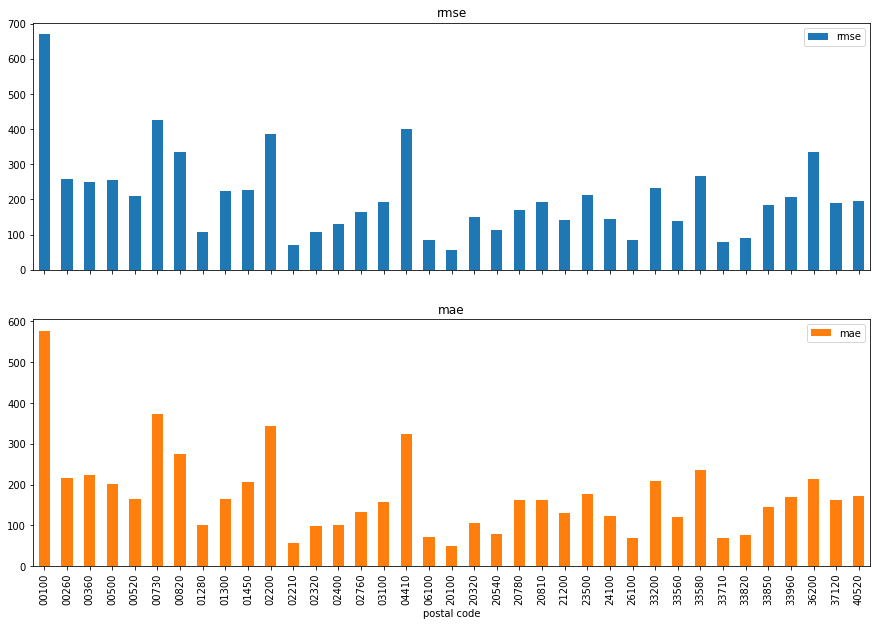

In [52]:
show_results(data,mae_values, rmse_values)

### With TAE's clustering methods

In [53]:
# Lets test with "Blocks of flats, one-room flat"

building_type = "Blocks of flats, one-room flat"

c_data = pd.read_csv("cluster-Copy1.csv", dtype={"Postal code": str})
c_data = c_data[c_data["Building type"].isin([building_type])]
data_labels = c_data[["Postal code","label2", "label4", "label5", "label7", "label8", "label10", "longitude", "latitude"]]

#### Disclaimer, clustered data is from imputed data. Therefore, it is not 100% accurate when predicting clusters. 

In [54]:
data_labels.head()

,Postal code,label2,label4,label5,label7,label8,label10,longitude,latitude
0,00100,0,0,3,0,0,0,24.9316,60.1714
5,00120,0,0,3,0,0,0,24.9391,60.1632
13,00140,0,0,3,0,0,0,24.9525,60.1578
18,00150,0,0,3,0,0,0,24.9369,60.1570
27,00170,0,0,3,0,0,0,24.9554,60.1728


In [55]:
## Lets combine with Bruces data

new_df = df.T
columns = new_df.iloc[0]
new_df = new_df.drop("time")
new_df.columns = columns
new_df[columns] = new_df[columns].apply(pd.to_numeric)
new_df = new_df.reset_index()
new_df = new_df.rename(columns={"index":"Postal code"})
new_df

time,Postal code,2010-01-01 00:00:00,2010-04-01 00:00:00,2010-07-01 00:00:00,2010-10-01 00:00:00,2011-01-01 00:00:00,2011-04-01 00:00:00,2011-07-01 00:00:00,2011-10-01 00:00:00,2012-01-01 00:00:00,...,2019-01-01 00:00:00,2019-04-01 00:00:00,2019-07-01 00:00:00,2019-10-01 00:00:00,2020-01-01 00:00:00,2020-04-01 00:00:00,2020-07-01 00:00:00,2020-10-01 00:00:00,2021-01-01 00:00:00,2021-04-01 00:00:00
0,00100,5168.0,5219.0,5181.0,5269.0,5632.0,5807.0,5630.0,5511.0,5843.0,...,7043.0,7478.0,7476.0,7345.0,7460.0,7275.0,8058.0,7540.0,8188.0,8188.0
1,00260,4873.0,5086.0,4939.0,4906.0,5272.0,5538.0,5166.0,5262.0,5122.0,...,6921.0,6877.0,6652.0,6844.0,7494.0,7486.0,7047.0,7506.0,7849.0,7903.0
2,00360,2756.0,3051.0,2889.0,3037.0,3188.0,3070.0,2923.0,3052.0,3020.0,...,4652.0,4492.0,4464.0,4345.0,4449.0,4728.0,4539.0,4577.0,4631.0,4979.0
3,00500,4058.0,4111.0,4247.0,4226.0,4342.0,4281.0,4420.0,4459.0,4429.0,...,6132.0,6375.0,6291.0,6406.0,6827.0,7010.0,6799.0,6648.0,7013.0,7098.0
4,00520,3317.0,3706.0,3672.0,3681.0,3654.0,3864.0,4285.0,3898.0,3854.0,...,4922.0,5206.0,5331.0,5434.0,5435.0,5711.0,5638.0,5668.0,5673.0,6282.0
5,00730,3006.0,3070.0,2944.0,3046.0,3061.0,2840.0,3189.0,2969.0,3147.0,...,3374.0,3390.0,3419.0,3072.0,3747.0,4008.0,3581.0,3993.0,3683.0,4006.0
6,00820,2652.0,2561.0,2632.0,2580.0,2793.0,2717.0,2723.0,2663.0,2765.0,...,3487.0,3741.0,3794.0,3479.0,3787.0,3709.0,3930.0,4180.0,4065.0,4460.0
7,01280,2098.0,2045.0,2210.0,2359.0,2165.0,2227.0,2123.0,2454.0,2358.0,...,2015.0,2068.0,2301.0,2116.0,1953.0,2291.0,2321.0,2138.0,2258.0,2255.0
8,01300,2616.0,2688.0,2814.0,2727.0,2734.0,2869.0,2846.0,2667.0,3020.0,...,3465.0,3378.0,3314.0,3464.0,3739.0,3883.0,3690.0,3718.0,4030.0,3830.0
9,01450,1809.0,2063.0,2080.0,2052.0,2200.0,2277.0,2362.0,2207.0,2332.0,...,2570.0,2343.0,2440.0,2381.0,2356.0,2609.0,2230.0,2459.0,2724.0,2389.0


In [56]:
new_df = new_df.merge(data_labels, on="Postal code", how="left")
new_df = new_df.dropna()
new_df.head()

,Postal code,2010-01-01 00:00:00,2010-04-01 00:00:00,2010-07-01 00:00:00,2010-10-01 00:00:00,2011-01-01 00:00:00,2011-04-01 00:00:00,2011-07-01 00:00:00,2011-10-01 00:00:00,2012-01-01 00:00:00,...,2021-01-01 00:00:00,2021-04-01 00:00:00,label2,label4,label5,label7,label8,label10,longitude,latitude
0,00100,5168.0,5219.0,5181.0,5269.0,5632.0,5807.0,5630.0,5511.0,5843.0,...,8188.0,8188.0,0.0,0.0,3.0,0.0,0.0,0.0,24.9316,60.1714
1,00260,4873.0,5086.0,4939.0,4906.0,5272.0,5538.0,5166.0,5262.0,5122.0,...,7849.0,7903.0,0.0,0.0,3.0,0.0,0.0,0.0,24.9226,60.1794
2,00360,2756.0,3051.0,2889.0,3037.0,3188.0,3070.0,2923.0,3052.0,3020.0,...,4631.0,4979.0,0.0,1.0,4.0,1.0,1.0,1.0,24.8564,60.2182
3,00500,4058.0,4111.0,4247.0,4226.0,4342.0,4281.0,4420.0,4459.0,4429.0,...,7013.0,7098.0,0.0,0.0,3.0,0.0,0.0,0.0,24.9601,60.1873
4,00520,3317.0,3706.0,3672.0,3681.0,3654.0,3864.0,4285.0,3898.0,3854.0,...,5673.0,6282.0,0.0,0.0,3.0,0.0,4.0,4.0,24.9416,60.1983


In [57]:
# Split data into different categories by labels.
# 1. Select label
# 2. Find postal codes belonging that label
# 3. Take mean value from all prices belonging that label
# 4. Return table containing mean housing price for each label

def select_labels(data, label):
    labels = list(data[label].unique())
    new_data = data.groupby(by=[label]).mean()
    new_data = new_data.T[:-7].reset_index()
    new_data = new_data.rename(columns={"index":"ds"})
    return new_data, labels
    

label = "label2"
clustered_df, labels = select_labels(new_df, label)

In [58]:
results, mae_values, rmse_values = prophet_for_each_postalcodes(clustered_df, labels, time="ds")

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


0.0
label2        y         ds
0       2860.20 2010-01-01
1       2950.00 2010-04-01
2       2993.50 2010-07-01
3       3011.90 2010-10-01
4       3074.90 2011-01-01
5       3100.65 2011-04-01
6       3138.75 2011-07-01
7       3067.85 2011-10-01
8       3153.90 2012-01-01
9       3190.50 2012-04-01
10      3278.65 2012-07-01
11      3258.45 2012-10-01
12      3277.65 2013-01-01
13      3272.55 2013-04-01
14      3380.25 2013-07-01
15      3343.55 2013-10-01
16      3326.85 2014-01-01
17      3381.65 2014-04-01
18      3354.25 2014-07-01
19      3352.90 2014-10-01
20      3431.50 2015-01-01
21      3392.95 2015-04-01
22      3440.15 2015-07-01
23      3389.15 2015-10-01
24      3459.45 2016-01-01
25      3437.10 2016-04-01
26      3359.85 2016-07-01
27      3491.75 2016-10-01
28      3496.55 2017-01-01
29      3575.20 2017-04-01
30      3675.70 2017-07-01
31      3624.80 2017-10-01
32      3693.00 2018-01-01
33      3735.50 2018-04-01
34      3812.25 2018-07-01
35      3760.15 2018-10-

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


1.0
label2            y         ds
0       1605.916667 2010-01-01
1       1619.000000 2010-04-01
2       1647.666667 2010-07-01
3       1597.916667 2010-10-01
4       1647.416667 2011-01-01
5       1657.083333 2011-04-01
6       1662.583333 2011-07-01
7       1632.666667 2011-10-01
8       1704.500000 2012-01-01
9       1728.250000 2012-04-01
10      1757.583333 2012-07-01
11      1649.083333 2012-10-01
12      1689.750000 2013-01-01
13      1726.333333 2013-04-01
14      1734.083333 2013-07-01
15      1711.250000 2013-10-01
16      1729.500000 2014-01-01
17      1745.083333 2014-04-01
18      1739.166667 2014-07-01
19      1695.750000 2014-10-01
20      1752.166667 2015-01-01
21      1765.000000 2015-04-01
22      1650.916667 2015-07-01
23      1656.750000 2015-10-01
24      1671.833333 2016-01-01
25      1716.333333 2016-04-01
26      1747.833333 2016-07-01
27      1722.000000 2016-10-01
28      1731.000000 2017-01-01
29      1703.750000 2017-04-01
30      1776.083333 2017-07-01
31  

In [59]:
all_labels = ["label2", "label5", "label7", "label8", "label10"]
all_result = []
all_mae = []
all_rmse = []

# Fitting for different labels

for label in all_labels:
    clustered_df, labels = select_labels(new_df, label)
    results2, mae_values2, rmse_values2 = prophet_for_each_postalcodes(clustered_df, labels, time="ds")
    all_result.append(results2)
    all_mae.append(mae_values2)
    all_rmse.append(rmse_values2)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


0.0
label2        y         ds
0       2860.20 2010-01-01
1       2950.00 2010-04-01
2       2993.50 2010-07-01
3       3011.90 2010-10-01
4       3074.90 2011-01-01
5       3100.65 2011-04-01
6       3138.75 2011-07-01
7       3067.85 2011-10-01
8       3153.90 2012-01-01
9       3190.50 2012-04-01
10      3278.65 2012-07-01
11      3258.45 2012-10-01
12      3277.65 2013-01-01
13      3272.55 2013-04-01
14      3380.25 2013-07-01
15      3343.55 2013-10-01
16      3326.85 2014-01-01
17      3381.65 2014-04-01
18      3354.25 2014-07-01
19      3352.90 2014-10-01
20      3431.50 2015-01-01
21      3392.95 2015-04-01
22      3440.15 2015-07-01
23      3389.15 2015-10-01
24      3459.45 2016-01-01
25      3437.10 2016-04-01
26      3359.85 2016-07-01
27      3491.75 2016-10-01
28      3496.55 2017-01-01
29      3575.20 2017-04-01
30      3675.70 2017-07-01
31      3624.80 2017-10-01
32      3693.00 2018-01-01
33      3735.50 2018-04-01
34      3812.25 2018-07-01
35      3760.15 2018-10-

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


1.0
label2            y         ds
0       1605.916667 2010-01-01
1       1619.000000 2010-04-01
2       1647.666667 2010-07-01
3       1597.916667 2010-10-01
4       1647.416667 2011-01-01
5       1657.083333 2011-04-01
6       1662.583333 2011-07-01
7       1632.666667 2011-10-01
8       1704.500000 2012-01-01
9       1728.250000 2012-04-01
10      1757.583333 2012-07-01
11      1649.083333 2012-10-01
12      1689.750000 2013-01-01
13      1726.333333 2013-04-01
14      1734.083333 2013-07-01
15      1711.250000 2013-10-01
16      1729.500000 2014-01-01
17      1745.083333 2014-04-01
18      1739.166667 2014-07-01
19      1695.750000 2014-10-01
20      1752.166667 2015-01-01
21      1765.000000 2015-04-01
22      1650.916667 2015-07-01
23      1656.750000 2015-10-01
24      1671.833333 2016-01-01
25      1716.333333 2016-04-01
26      1747.833333 2016-07-01
27      1722.000000 2016-10-01
28      1731.000000 2017-01-01
29      1703.750000 2017-04-01
30      1776.083333 2017-07-01
31  

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


3.0
label5        y         ds
0       4354.00 2010-01-01
1       4530.50 2010-04-01
2       4509.75 2010-07-01
3       4520.50 2010-10-01
4       4725.00 2011-01-01
5       4872.50 2011-04-01
6       4875.25 2011-07-01
7       4782.50 2011-10-01
8       4812.00 2012-01-01
9       4960.50 2012-04-01
10      5077.75 2012-07-01
11      5110.50 2012-10-01
12      5209.25 2013-01-01
13      5263.75 2013-04-01
14      5399.75 2013-07-01
15      5374.00 2013-10-01
16      5261.25 2014-01-01
17      5334.75 2014-04-01
18      5548.25 2014-07-01
19      5339.50 2014-10-01
20      5512.75 2015-01-01
21      5496.25 2015-04-01
22      5576.75 2015-07-01
23      5526.75 2015-10-01
24      5613.25 2016-01-01
25      5632.50 2016-04-01
26      5250.75 2016-07-01
27      5784.50 2016-10-01
28      5822.00 2017-01-01
29      6035.00 2017-04-01
30      6106.25 2017-07-01
31      6018.25 2017-10-01
32      6099.50 2018-01-01
33      6379.75 2018-04-01
34      6463.50 2018-07-01
35      6427.75 2018-10-

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


4.0
label5       y         ds
0       2718.3 2010-01-01
1       2813.3 2010-04-01
2       2805.9 2010-07-01
3       2852.4 2010-10-01
4       2878.2 2011-01-01
5       2899.3 2011-04-01
6       2931.2 2011-07-01
7       2831.9 2011-10-01
8       2938.4 2012-01-01
9       3005.7 2012-04-01
10      3022.7 2012-07-01
11      3046.1 2012-10-01
12      3047.8 2013-01-01
13      3037.2 2013-04-01
14      3130.1 2013-07-01
15      3113.6 2013-10-01
16      3067.3 2014-01-01
17      3164.7 2014-04-01
18      3107.7 2014-07-01
19      3132.8 2014-10-01
20      3182.6 2015-01-01
21      3172.3 2015-04-01
22      3154.9 2015-07-01
23      3105.3 2015-10-01
24      3255.9 2016-01-01
25      3157.6 2016-04-01
26      3221.8 2016-07-01
27      3228.3 2016-10-01
28      3275.9 2017-01-01
29      3253.1 2017-04-01
30      3412.2 2017-07-01
31      3340.6 2017-10-01
32      3445.1 2018-01-01
33      3426.4 2018-04-01
34      3504.2 2018-07-01
35      3480.6 2018-10-01
36      3592.2 2019-01-01
37      

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


0.0
label5       y         ds
0       1995.5 2010-01-01
1       2005.5 2010-04-01
2       2130.9 2010-07-01
3       2067.2 2010-10-01
4       2128.6 2011-01-01
5       2113.6 2011-04-01
6       2159.0 2011-07-01
7       2156.2 2011-10-01
8       2212.4 2012-01-01
9       2171.9 2012-04-01
10      2300.3 2012-07-01
11      2237.4 2012-10-01
12      2217.4 2013-01-01
13      2202.4 2013-04-01
14      2279.1 2013-07-01
15      2220.6 2013-10-01
16      2282.4 2014-01-01
17      2276.3 2014-04-01
18      2187.2 2014-07-01
19      2238.4 2014-10-01
20      2293.1 2015-01-01
21      2236.6 2015-04-01
22      2278.7 2015-07-01
23      2196.1 2015-10-01
24      2212.0 2016-01-01
25      2293.5 2016-04-01
26      2216.1 2016-07-01
27      2258.2 2016-10-01
28      2210.7 2017-01-01
29      2291.1 2017-04-01
30      2328.8 2017-07-01
31      2330.6 2017-10-01
32      2356.7 2018-01-01
33      2347.0 2018-04-01
34      2388.2 2018-07-01
35      2324.3 2018-10-01
36      2383.7 2019-01-01
37      

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


1.0
label5            y         ds
0       1578.142857 2010-01-01
1       1613.714286 2010-04-01
2       1628.142857 2010-07-01
3       1627.000000 2010-10-01
4       1629.142857 2011-01-01
5       1620.714286 2011-04-01
6       1633.000000 2011-07-01
7       1580.571429 2011-10-01
8       1693.285714 2012-01-01
9       1694.857143 2012-04-01
10      1722.142857 2012-07-01
11      1526.571429 2012-10-01
12      1609.285714 2013-01-01
13      1661.285714 2013-04-01
14      1678.857143 2013-07-01
15      1645.857143 2013-10-01
16      1673.000000 2014-01-01
17      1683.142857 2014-04-01
18      1674.714286 2014-07-01
19      1615.857143 2014-10-01
20      1680.714286 2015-01-01
21      1691.142857 2015-04-01
22      1566.571429 2015-07-01
23      1642.857143 2015-10-01
24      1584.142857 2016-01-01
25      1615.714286 2016-04-01
26      1668.571429 2016-07-01
27      1639.857143 2016-10-01
28      1638.000000 2017-01-01
29      1589.571429 2017-04-01
30      1676.142857 2017-07-01
31  

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2.0
label5       y         ds
0        874.0 2010-01-01
1        822.0 2010-04-01
2        838.0 2010-07-01
3        746.0 2010-10-01
4        895.0 2011-01-01
5        934.0 2011-04-01
6        892.0 2011-07-01
7        874.0 2011-10-01
8        923.0 2012-01-01
9       1067.0 2012-04-01
10      1068.0 2012-07-01
11       995.0 2012-10-01
12      1076.0 2013-01-01
13      1087.0 2013-04-01
14       971.0 2013-07-01
15      1047.0 2013-10-01
16      1038.0 2014-01-01
17      1043.0 2014-04-01
18      1090.0 2014-07-01
19      1026.0 2014-10-01
20      1083.0 2015-01-01
21      1127.0 2015-04-01
22      1005.0 2015-07-01
23      1043.0 2015-10-01
24      1030.0 2016-01-01
25       987.0 2016-04-01
26      1109.0 2016-07-01
27      1017.0 2016-10-01
28      1083.0 2017-01-01
29      1240.0 2017-04-01
30      1259.0 2017-07-01
31      1166.0 2017-10-01
32      1202.0 2018-01-01
33      1324.0 2018-04-01
34      1287.0 2018-07-01
35      1143.0 2018-10-01
36      1222.0 2019-01-01
37      

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


0.0
label7        y         ds
0       4354.00 2010-01-01
1       4530.50 2010-04-01
2       4509.75 2010-07-01
3       4520.50 2010-10-01
4       4725.00 2011-01-01
5       4872.50 2011-04-01
6       4875.25 2011-07-01
7       4782.50 2011-10-01
8       4812.00 2012-01-01
9       4960.50 2012-04-01
10      5077.75 2012-07-01
11      5110.50 2012-10-01
12      5209.25 2013-01-01
13      5263.75 2013-04-01
14      5399.75 2013-07-01
15      5374.00 2013-10-01
16      5261.25 2014-01-01
17      5334.75 2014-04-01
18      5548.25 2014-07-01
19      5339.50 2014-10-01
20      5512.75 2015-01-01
21      5496.25 2015-04-01
22      5576.75 2015-07-01
23      5526.75 2015-10-01
24      5613.25 2016-01-01
25      5632.50 2016-04-01
26      5250.75 2016-07-01
27      5784.50 2016-10-01
28      5822.00 2017-01-01
29      6035.00 2017-04-01
30      6106.25 2017-07-01
31      6018.25 2017-10-01
32      6099.50 2018-01-01
33      6379.75 2018-04-01
34      6463.50 2018-07-01
35      6427.75 2018-10-

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


1.0
label7       y         ds
0       2592.1 2010-01-01
1       2703.8 2010-04-01
2       2692.1 2010-07-01
3       2725.0 2010-10-01
4       2783.2 2011-01-01
5       2757.8 2011-04-01
6       2817.6 2011-07-01
7       2701.6 2011-10-01
8       2794.4 2012-01-01
9       2846.2 2012-04-01
10      2889.0 2012-07-01
11      2872.1 2012-10-01
12      2883.9 2013-01-01
13      2903.3 2013-04-01
14      2979.4 2013-07-01
15      2916.3 2013-10-01
16      2916.6 2014-01-01
17      3018.9 2014-04-01
18      2901.2 2014-07-01
19      2935.4 2014-10-01
20      3017.8 2015-01-01
21      2952.4 2015-04-01
22      2962.1 2015-07-01
23      3001.4 2015-10-01
24      3045.4 2016-01-01
25      2985.5 2016-04-01
26      3068.9 2016-07-01
27      3109.4 2016-10-01
28      3059.7 2017-01-01
29      3055.7 2017-04-01
30      3176.4 2017-07-01
31      3179.8 2017-10-01
32      3269.7 2018-01-01
33      3239.3 2018-04-01
34      3230.0 2018-07-01
35      3281.4 2018-10-01
36      3370.2 2019-01-01
37      

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


4.0
label7       y         ds
0       2968.5 2010-01-01
1       2913.5 2010-04-01
2       3073.5 2010-07-01
3       3106.5 2010-10-01
4       3005.0 2011-01-01
5       3123.5 2011-04-01
6       3109.0 2011-07-01
7       3062.5 2011-10-01
8       3299.5 2012-01-01
9       3335.5 2012-04-01
10      3341.5 2012-07-01
11      3410.5 2012-10-01
12      3389.0 2013-01-01
13      3190.0 2013-04-01
14      3292.0 2013-07-01
15      3521.5 2013-10-01
16      3478.0 2014-01-01
17      3431.5 2014-04-01
18      3582.5 2014-07-01
19      3533.0 2014-10-01
20      3442.5 2015-01-01
21      3741.5 2015-04-01
22      3507.0 2015-07-01
23      3168.5 2015-10-01
24      3739.0 2016-01-01
25      3664.5 2016-04-01
26      3401.5 2016-07-01
27      3498.0 2016-10-01
28      3680.5 2017-01-01
29      3798.5 2017-04-01
30      3963.5 2017-07-01
31      3729.5 2017-10-01
32      3814.5 2018-01-01
33      3867.0 2018-04-01
34      4168.5 2018-07-01
35      3937.0 2018-10-01
36      4085.5 2019-01-01
37      

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2.0
label7         y         ds
0       1910.000 2010-01-01
1       1915.375 2010-04-01
2       2037.500 2010-07-01
3       1966.625 2010-10-01
4       2028.250 2011-01-01
5       2038.000 2011-04-01
6       2063.500 2011-07-01
7       2092.500 2011-10-01
8       2120.625 2012-01-01
9       2080.375 2012-04-01
10      2207.125 2012-07-01
11      2161.625 2012-10-01
12      2129.375 2013-01-01
13      2122.875 2013-04-01
14      2214.250 2013-07-01
15      2142.000 2013-10-01
16      2171.875 2014-01-01
17      2169.750 2014-04-01
18      2096.500 2014-07-01
19      2161.500 2014-10-01
20      2211.750 2015-01-01
21      2135.250 2015-04-01
22      2212.625 2015-07-01
23      2082.875 2015-10-01
24      2093.375 2016-01-01
25      2165.875 2016-04-01
26      2110.875 2016-07-01
27      2096.875 2016-10-01
28      2113.500 2017-01-01
29      2161.000 2017-04-01
30      2214.875 2017-07-01
31      2181.875 2017-10-01
32      2211.500 2018-01-01
33      2200.875 2018-04-01
34      2285.875

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


5.0
label7            y         ds
0       1578.142857 2010-01-01
1       1613.714286 2010-04-01
2       1628.142857 2010-07-01
3       1627.000000 2010-10-01
4       1629.142857 2011-01-01
5       1620.714286 2011-04-01
6       1633.000000 2011-07-01
7       1580.571429 2011-10-01
8       1693.285714 2012-01-01
9       1694.857143 2012-04-01
10      1722.142857 2012-07-01
11      1526.571429 2012-10-01
12      1609.285714 2013-01-01
13      1661.285714 2013-04-01
14      1678.857143 2013-07-01
15      1645.857143 2013-10-01
16      1673.000000 2014-01-01
17      1683.142857 2014-04-01
18      1674.714286 2014-07-01
19      1615.857143 2014-10-01
20      1680.714286 2015-01-01
21      1691.142857 2015-04-01
22      1566.571429 2015-07-01
23      1642.857143 2015-10-01
24      1584.142857 2016-01-01
25      1615.714286 2016-04-01
26      1668.571429 2016-07-01
27      1639.857143 2016-10-01
28      1638.000000 2017-01-01
29      1589.571429 2017-04-01
30      1676.142857 2017-07-01
31  

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


3.0
label7       y         ds
0        874.0 2010-01-01
1        822.0 2010-04-01
2        838.0 2010-07-01
3        746.0 2010-10-01
4        895.0 2011-01-01
5        934.0 2011-04-01
6        892.0 2011-07-01
7        874.0 2011-10-01
8        923.0 2012-01-01
9       1067.0 2012-04-01
10      1068.0 2012-07-01
11       995.0 2012-10-01
12      1076.0 2013-01-01
13      1087.0 2013-04-01
14       971.0 2013-07-01
15      1047.0 2013-10-01
16      1038.0 2014-01-01
17      1043.0 2014-04-01
18      1090.0 2014-07-01
19      1026.0 2014-10-01
20      1083.0 2015-01-01
21      1127.0 2015-04-01
22      1005.0 2015-07-01
23      1043.0 2015-10-01
24      1030.0 2016-01-01
25       987.0 2016-04-01
26      1109.0 2016-07-01
27      1017.0 2016-10-01
28      1083.0 2017-01-01
29      1240.0 2017-04-01
30      1259.0 2017-07-01
31      1166.0 2017-10-01
32      1202.0 2018-01-01
33      1324.0 2018-04-01
34      1287.0 2018-07-01
35      1143.0 2018-10-01
36      1222.0 2019-01-01
37      

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


0.0
label8            y         ds
0       4699.666667 2010-01-01
1       4805.333333 2010-04-01
2       4789.000000 2010-07-01
3       4800.333333 2010-10-01
4       5082.000000 2011-01-01
5       5208.666667 2011-04-01
6       5072.000000 2011-07-01
7       5077.333333 2011-10-01
8       5131.333333 2012-01-01
9       5261.666667 2012-04-01
10      5422.000000 2012-07-01
11      5387.333333 2012-10-01
12      5441.000000 2013-01-01
13      5551.000000 2013-04-01
14      5654.000000 2013-07-01
15      5730.000000 2013-10-01
16      5651.000000 2014-01-01
17      5657.333333 2014-04-01
18      5837.666667 2014-07-01
19      5680.666667 2014-10-01
20      5871.666667 2015-01-01
21      5721.000000 2015-04-01
22      5765.666667 2015-07-01
23      5746.333333 2015-10-01
24      5860.333333 2016-01-01
25      5901.333333 2016-04-01
26      5473.000000 2016-07-01
27      6106.333333 2016-10-01
28      6087.333333 2017-01-01
29      6360.000000 2017-04-01
30      6420.000000 2017-07-01
31  

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


1.0
label8            y         ds
0       2655.333333 2010-01-01
1       2763.000000 2010-04-01
2       2727.111111 2010-07-01
3       2765.666667 2010-10-01
4       2840.555556 2011-01-01
5       2829.222222 2011-04-01
6       2868.555556 2011-07-01
7       2761.888889 2011-10-01
8       2838.888889 2012-01-01
9       2914.444444 2012-04-01
10      2940.444444 2012-07-01
11      2943.333333 2012-10-01
12      2950.333333 2013-01-01
13      2989.777778 2013-04-01
14      3062.444444 2013-07-01
15      2989.444444 2013-10-01
16      2953.555556 2014-01-01
17      3067.777778 2014-04-01
18      2999.111111 2014-07-01
19      3013.888889 2014-10-01
20      3112.666667 2015-01-01
21      3035.888889 2015-04-01
22      3050.444444 2015-07-01
23      3048.888889 2015-10-01
24      3129.111111 2016-01-01
25      3043.555556 2016-04-01
26      3149.888889 2016-07-01
27      3129.222222 2016-10-01
28      3185.333333 2017-01-01
29      3116.555556 2017-04-01
30      3307.888889 2017-07-01
31  

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


4.0
label8       y         ds
0       3301.0 2010-01-01
1       3486.0 2010-04-01
2       3593.5 2010-07-01
3       3657.0 2010-10-01
4       3435.5 2011-01-01
5       3697.0 2011-04-01
6       3890.0 2011-07-01
7       3680.0 2011-10-01
8       3844.0 2012-01-01
9       3942.0 2012-04-01
10      3904.0 2012-07-01
11      4125.5 2012-10-01
12      4219.5 2013-01-01
13      3933.0 2013-04-01
14      4188.0 2013-07-01
15      4268.5 2013-10-01
16      4091.5 2014-01-01
17      4202.0 2014-04-01
18      4382.5 2014-07-01
19      4259.5 2014-10-01
20      4124.0 2015-01-01
21      4611.0 2015-04-01
22      4552.5 2015-07-01
23      4240.5 2015-10-01
24      4634.5 2016-01-01
25      4505.0 2016-04-01
26      4226.5 2016-07-01
27      4469.5 2016-10-01
28      4558.5 2017-01-01
29      4771.0 2017-04-01
30      4758.0 2017-07-01
31      4718.5 2017-10-01
32      4803.0 2018-01-01
33      4998.0 2018-04-01
34      5202.5 2018-07-01
35      4962.5 2018-10-01
36      4803.0 2019-01-01
37      

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


7.0
label8            y         ds
0       2100.833333 2010-01-01
1       2124.166667 2010-04-01
2       2295.333333 2010-07-01
3       2272.000000 2010-10-01
4       2302.666667 2011-01-01
5       2255.000000 2011-04-01
6       2327.000000 2011-07-01
7       2318.000000 2011-10-01
8       2407.666667 2012-01-01
9       2318.500000 2012-04-01
10      2505.833333 2012-07-01
11      2377.666667 2012-10-01
12      2373.000000 2013-01-01
13      2337.333333 2013-04-01
14      2450.833333 2013-07-01
15      2373.166667 2013-10-01
16      2469.833333 2014-01-01
17      2441.166667 2014-04-01
18      2302.500000 2014-07-01
19      2395.333333 2014-10-01
20      2458.833333 2015-01-01
21      2358.500000 2015-04-01
22      2491.166667 2015-07-01
23      2437.166667 2015-10-01
24      2362.833333 2016-01-01
25      2439.333333 2016-04-01
26      2329.333333 2016-07-01
27      2402.333333 2016-10-01
28      2314.000000 2017-01-01
29      2472.166667 2017-04-01
30      2494.500000 2017-07-01
31  

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2.0
label8            y         ds
0       1811.500000 2010-01-01
1       1829.833333 2010-04-01
2       1814.666667 2010-07-01
3       1754.833333 2010-10-01
4       1817.333333 2011-01-01
5       1862.000000 2011-04-01
6       1834.500000 2011-07-01
7       1882.833333 2011-10-01
8       1921.000000 2012-01-01
9       1917.666667 2012-04-01
10      1975.000000 2012-07-01
11      1962.666667 2012-10-01
12      1950.000000 2013-01-01
13      1974.000000 2013-04-01
14      1977.666667 2013-07-01
15      1918.166667 2013-10-01
16      2013.333333 2014-01-01
17      2009.666667 2014-04-01
18      2002.333333 2014-07-01
19      1954.000000 2014-10-01
20      1996.500000 2015-01-01
21      2053.500000 2015-04-01
22      1818.500000 2015-07-01
23      1832.000000 2015-10-01
24      1899.333333 2016-01-01
25      2044.166667 2016-04-01
26      2057.833333 2016-07-01
27      1984.500000 2016-10-01
28      1980.000000 2017-01-01
29      1955.500000 2017-04-01
30      2008.000000 2017-07-01
31  

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


5.0
label8       y         ds
0       1505.6 2010-01-01
1       1525.4 2010-04-01
2       1609.2 2010-07-01
3       1580.0 2010-10-01
4       1594.0 2011-01-01
5       1555.8 2011-04-01
6       1610.4 2011-07-01
7       1484.2 2011-10-01
8       1601.0 2012-01-01
9       1633.2 2012-04-01
10      1634.6 2012-07-01
11      1403.6 2012-10-01
12      1500.2 2013-01-01
13      1557.0 2013-04-01
14      1594.4 2013-07-01
15      1595.8 2013-10-01
16      1527.2 2014-01-01
17      1568.0 2014-04-01
18      1553.2 2014-07-01
19      1519.8 2014-10-01
20      1592.8 2015-01-01
21      1546.4 2015-04-01
22      1579.0 2015-07-01
23      1569.2 2015-10-01
24      1527.2 2016-01-01
25      1468.8 2016-04-01
26      1503.6 2016-07-01
27      1548.0 2016-10-01
28      1561.8 2017-01-01
29      1494.4 2017-04-01
30      1601.2 2017-07-01
31      1589.8 2017-10-01
32      1591.2 2018-01-01
33      1455.8 2018-04-01
34      1555.2 2018-07-01
35      1467.8 2018-10-01
36      1639.6 2019-01-01
37      

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


3.0
label8       y         ds
0        874.0 2010-01-01
1        822.0 2010-04-01
2        838.0 2010-07-01
3        746.0 2010-10-01
4        895.0 2011-01-01
5        934.0 2011-04-01
6        892.0 2011-07-01
7        874.0 2011-10-01
8        923.0 2012-01-01
9       1067.0 2012-04-01
10      1068.0 2012-07-01
11       995.0 2012-10-01
12      1076.0 2013-01-01
13      1087.0 2013-04-01
14       971.0 2013-07-01
15      1047.0 2013-10-01
16      1038.0 2014-01-01
17      1043.0 2014-04-01
18      1090.0 2014-07-01
19      1026.0 2014-10-01
20      1083.0 2015-01-01
21      1127.0 2015-04-01
22      1005.0 2015-07-01
23      1043.0 2015-10-01
24      1030.0 2016-01-01
25       987.0 2016-04-01
26      1109.0 2016-07-01
27      1017.0 2016-10-01
28      1083.0 2017-01-01
29      1240.0 2017-04-01
30      1259.0 2017-07-01
31      1166.0 2017-10-01
32      1202.0 2018-01-01
33      1324.0 2018-04-01
34      1287.0 2018-07-01
35      1143.0 2018-10-01
36      1222.0 2019-01-01
37      

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


0.0
label10            y         ds
0        4699.666667 2010-01-01
1        4805.333333 2010-04-01
2        4789.000000 2010-07-01
3        4800.333333 2010-10-01
4        5082.000000 2011-01-01
5        5208.666667 2011-04-01
6        5072.000000 2011-07-01
7        5077.333333 2011-10-01
8        5131.333333 2012-01-01
9        5261.666667 2012-04-01
10       5422.000000 2012-07-01
11       5387.333333 2012-10-01
12       5441.000000 2013-01-01
13       5551.000000 2013-04-01
14       5654.000000 2013-07-01
15       5730.000000 2013-10-01
16       5651.000000 2014-01-01
17       5657.333333 2014-04-01
18       5837.666667 2014-07-01
19       5680.666667 2014-10-01
20       5871.666667 2015-01-01
21       5721.000000 2015-04-01
22       5765.666667 2015-07-01
23       5746.333333 2015-10-01
24       5860.333333 2016-01-01
25       5901.333333 2016-04-01
26       5473.000000 2016-07-01
27       6106.333333 2016-10-01
28       6087.333333 2017-01-01
29       6360.000000 2017-04-01
30  

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


1.0
label10            y         ds
0        2655.333333 2010-01-01
1        2763.000000 2010-04-01
2        2727.111111 2010-07-01
3        2765.666667 2010-10-01
4        2840.555556 2011-01-01
5        2829.222222 2011-04-01
6        2868.555556 2011-07-01
7        2761.888889 2011-10-01
8        2838.888889 2012-01-01
9        2914.444444 2012-04-01
10       2940.444444 2012-07-01
11       2943.333333 2012-10-01
12       2950.333333 2013-01-01
13       2989.777778 2013-04-01
14       3062.444444 2013-07-01
15       2989.444444 2013-10-01
16       2953.555556 2014-01-01
17       3067.777778 2014-04-01
18       2999.111111 2014-07-01
19       3013.888889 2014-10-01
20       3112.666667 2015-01-01
21       3035.888889 2015-04-01
22       3050.444444 2015-07-01
23       3048.888889 2015-10-01
24       3129.111111 2016-01-01
25       3043.555556 2016-04-01
26       3149.888889 2016-07-01
27       3129.222222 2016-10-01
28       3185.333333 2017-01-01
29       3116.555556 2017-04-01
30  

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


4.0
label10       y         ds
0        3301.0 2010-01-01
1        3486.0 2010-04-01
2        3593.5 2010-07-01
3        3657.0 2010-10-01
4        3435.5 2011-01-01
5        3697.0 2011-04-01
6        3890.0 2011-07-01
7        3680.0 2011-10-01
8        3844.0 2012-01-01
9        3942.0 2012-04-01
10       3904.0 2012-07-01
11       4125.5 2012-10-01
12       4219.5 2013-01-01
13       3933.0 2013-04-01
14       4188.0 2013-07-01
15       4268.5 2013-10-01
16       4091.5 2014-01-01
17       4202.0 2014-04-01
18       4382.5 2014-07-01
19       4259.5 2014-10-01
20       4124.0 2015-01-01
21       4611.0 2015-04-01
22       4552.5 2015-07-01
23       4240.5 2015-10-01
24       4634.5 2016-01-01
25       4505.0 2016-04-01
26       4226.5 2016-07-01
27       4469.5 2016-10-01
28       4558.5 2017-01-01
29       4771.0 2017-04-01
30       4758.0 2017-07-01
31       4718.5 2017-10-01
32       4803.0 2018-01-01
33       4998.0 2018-04-01
34       5202.5 2018-07-01
35       4962.5 2018-10-

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


7.0
label10            y         ds
0        2100.833333 2010-01-01
1        2124.166667 2010-04-01
2        2295.333333 2010-07-01
3        2272.000000 2010-10-01
4        2302.666667 2011-01-01
5        2255.000000 2011-04-01
6        2327.000000 2011-07-01
7        2318.000000 2011-10-01
8        2407.666667 2012-01-01
9        2318.500000 2012-04-01
10       2505.833333 2012-07-01
11       2377.666667 2012-10-01
12       2373.000000 2013-01-01
13       2337.333333 2013-04-01
14       2450.833333 2013-07-01
15       2373.166667 2013-10-01
16       2469.833333 2014-01-01
17       2441.166667 2014-04-01
18       2302.500000 2014-07-01
19       2395.333333 2014-10-01
20       2458.833333 2015-01-01
21       2358.500000 2015-04-01
22       2491.166667 2015-07-01
23       2437.166667 2015-10-01
24       2362.833333 2016-01-01
25       2439.333333 2016-04-01
26       2329.333333 2016-07-01
27       2402.333333 2016-10-01
28       2314.000000 2017-01-01
29       2472.166667 2017-04-01
30  

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2.0
label10        y         ds
0        1837.50 2010-01-01
1        1827.50 2010-04-01
2        1884.25 2010-07-01
3        1760.00 2010-10-01
4        1867.50 2011-01-01
5        1901.50 2011-04-01
6        1907.00 2011-07-01
7        1913.50 2011-10-01
8        1919.50 2012-01-01
9        1952.00 2012-04-01
10       1992.00 2012-07-01
11       2027.00 2012-10-01
12       1984.00 2013-01-01
13       2000.00 2013-04-01
14       2021.50 2013-07-01
15       1991.75 2013-10-01
16       2001.25 2014-01-01
17       2029.00 2014-04-01
18       2014.25 2014-07-01
19       2003.00 2014-10-01
20       2044.50 2015-01-01
21       2053.75 2015-04-01
22       1960.00 2015-07-01
23       1834.50 2015-10-01
24       1985.75 2016-01-01
25       2074.75 2016-04-01
26       2046.25 2016-07-01
27       2042.00 2016-10-01
28       2055.75 2017-01-01
29       2019.50 2017-04-01
30       2080.25 2017-07-01
31       2072.25 2017-10-01
32       2139.00 2018-01-01
33       2135.75 2018-04-01
34       2133.25

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


5.0
label10        y         ds
0        1694.00 2010-01-01
1        1709.00 2010-04-01
2        1747.75 2010-07-01
3        1736.00 2010-10-01
4        1695.00 2011-01-01
5        1703.75 2011-04-01
6        1690.00 2011-07-01
7        1689.50 2011-10-01
8        1797.50 2012-01-01
9        1827.50 2012-04-01
10       1836.25 2012-07-01
11       1679.50 2012-10-01
12       1740.50 2013-01-01
13       1793.25 2013-04-01
14       1859.75 2013-07-01
15       1789.25 2013-10-01
16       1823.25 2014-01-01
17       1883.00 2014-04-01
18       1808.50 2014-07-01
19       1734.25 2014-10-01
20       1860.00 2015-01-01
21       1895.00 2015-04-01
22       1636.00 2015-07-01
23       1868.25 2015-10-01
24       1729.25 2016-01-01
25       1839.25 2016-04-01
26       1817.75 2016-07-01
27       1821.75 2016-10-01
28       1810.50 2017-01-01
29       1722.75 2017-04-01
30       1800.00 2017-07-01
31       1934.50 2017-10-01
32       1837.75 2018-01-01
33       1783.75 2018-04-01
34       1961.75

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


9.0
label10            y         ds
0        1423.666667 2010-01-01
1        1486.666667 2010-04-01
2        1468.666667 2010-07-01
3        1481.666667 2010-10-01
4        1541.333333 2011-01-01
5        1510.000000 2011-04-01
6        1557.000000 2011-07-01
7        1435.333333 2011-10-01
8        1554.333333 2012-01-01
9        1518.000000 2012-04-01
10       1570.000000 2012-07-01
11       1322.666667 2012-10-01
12       1434.333333 2013-01-01
13       1485.333333 2013-04-01
14       1437.666667 2013-07-01
15       1454.666667 2013-10-01
16       1472.666667 2014-01-01
17       1416.666667 2014-04-01
18       1496.333333 2014-07-01
19       1458.000000 2014-10-01
20       1441.666667 2015-01-01
21       1419.333333 2015-04-01
22       1474.000000 2015-07-01
23       1342.333333 2015-10-01
24       1390.666667 2016-01-01
25       1317.666667 2016-04-01
26       1469.666667 2016-07-01
27       1397.333333 2016-10-01
28       1408.000000 2017-01-01
29       1412.000000 2017-04-01
30  

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


6.0
label10       y         ds
0         874.0 2010-01-01
1         822.0 2010-04-01
2         838.0 2010-07-01
3         746.0 2010-10-01
4         895.0 2011-01-01
5         934.0 2011-04-01
6         892.0 2011-07-01
7         874.0 2011-10-01
8         923.0 2012-01-01
9        1067.0 2012-04-01
10       1068.0 2012-07-01
11        995.0 2012-10-01
12       1076.0 2013-01-01
13       1087.0 2013-04-01
14        971.0 2013-07-01
15       1047.0 2013-10-01
16       1038.0 2014-01-01
17       1043.0 2014-04-01
18       1090.0 2014-07-01
19       1026.0 2014-10-01
20       1083.0 2015-01-01
21       1127.0 2015-04-01
22       1005.0 2015-07-01
23       1043.0 2015-10-01
24       1030.0 2016-01-01
25        987.0 2016-04-01
26       1109.0 2016-07-01
27       1017.0 2016-10-01
28       1083.0 2017-01-01
29       1240.0 2017-04-01
30       1259.0 2017-07-01
31       1166.0 2017-10-01
32       1202.0 2018-01-01
33       1324.0 2018-04-01
34       1287.0 2018-07-01
35       1143.0 2018-10-

5
When using label2:
Median MAE: 54.168
Median RMSE: 69.622
When using label5:
Median MAE: 75.346
Median RMSE: 91.166
When using label7:
Median MAE: 130.859
Median RMSE: 145.425
When using label8:
Median MAE: 99.405
Median RMSE: 122.876
When using label10:
Median MAE: 93.369
Median RMSE: 113.788


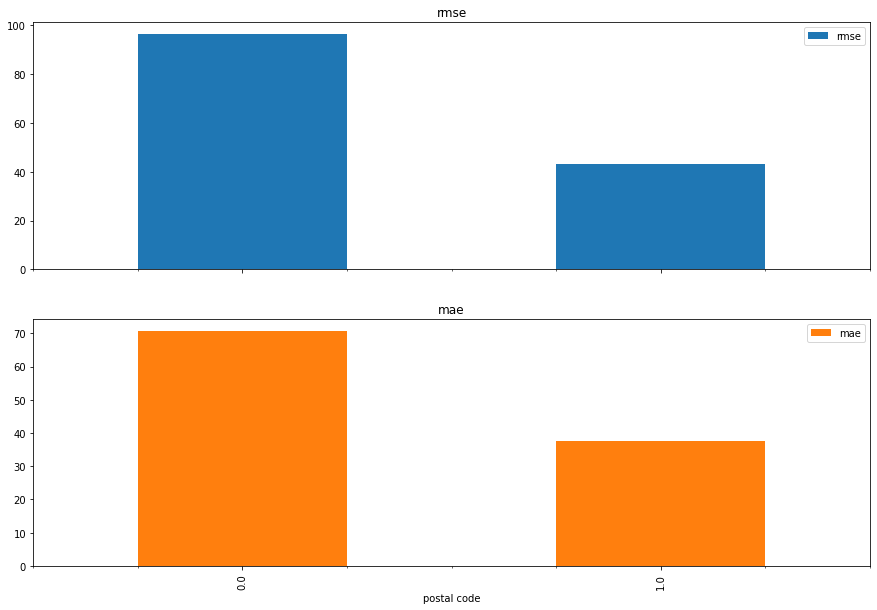

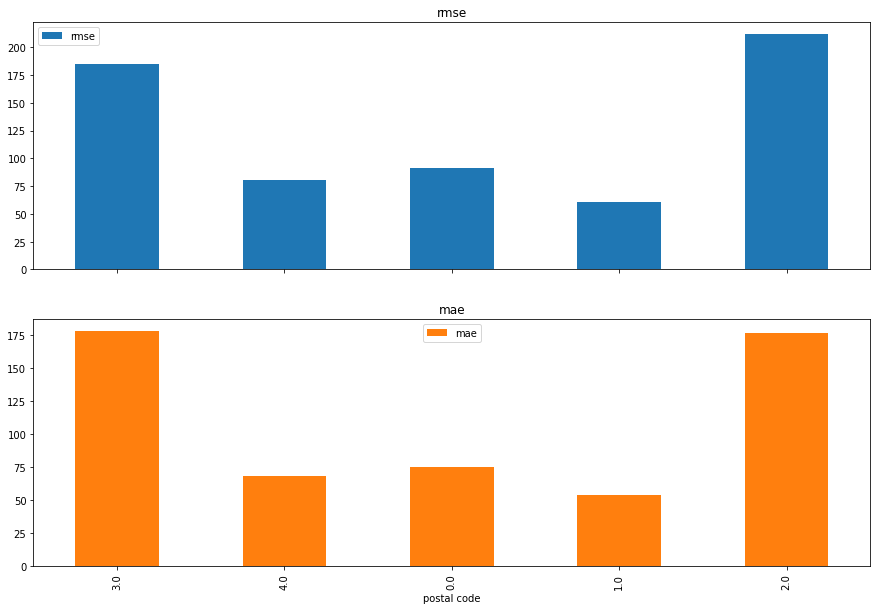

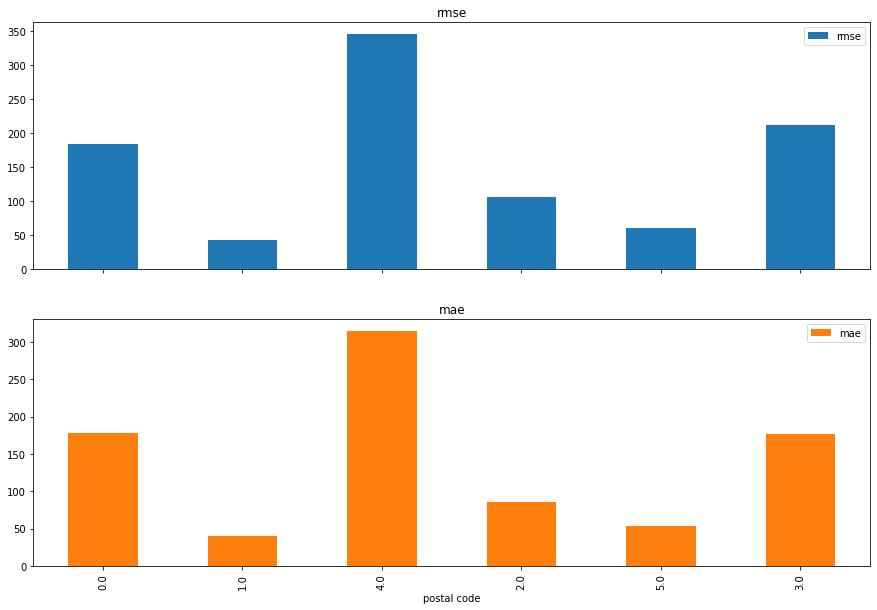

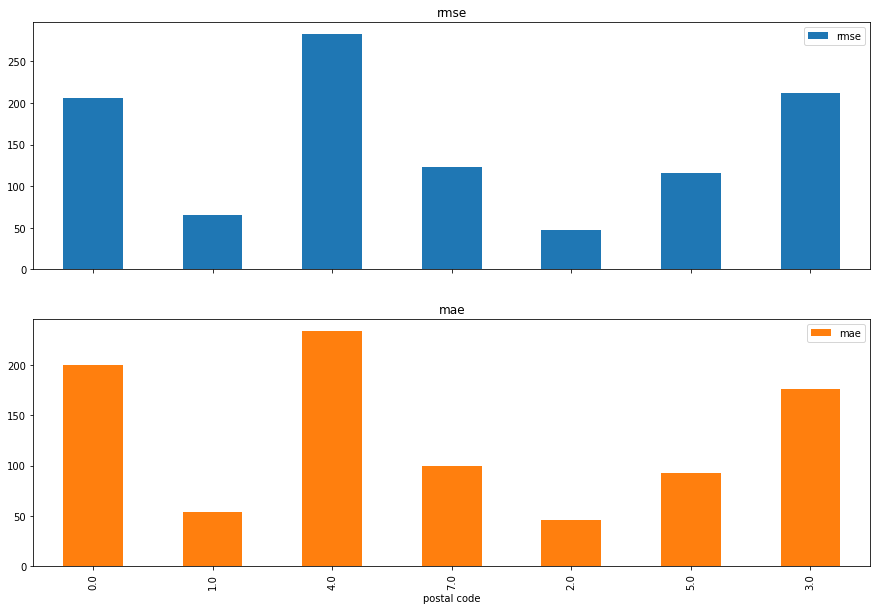

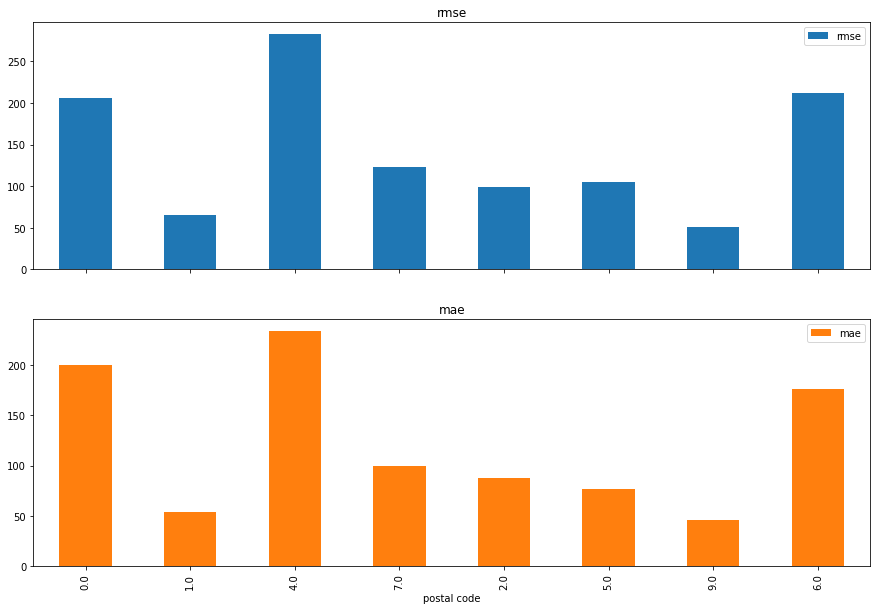

In [60]:
print(len(all_rmse))

for i in range(len(all_result)):
    print("When using {}:".format(all_labels[i]))
    show_results(all_result[i], all_mae[i], all_rmse[i])

## With Geographical location

First we train a model for each postal codes. Postal codes do not have empty cells. Idea is to train model for each postal code and use geolocational information to match input with model. 

**For example, lets suppose we have postal code from otaniemi and it isnt in dataset. Therefore we cannot make model for it. However we can use a model which is located near to Otaniemi such as Tapiola for prediction. How? We calculate nearest postal code by using Otaniemi's latitude and longitude values.**

In [64]:
# Work in progress, fix when user input wrong type of value e.g. random text instead of postal code
# Disclaimer: df should contain latitude and longitude as well

def min_euclidean_distance(row, latitude, longitude):
    d2 = np.square( row.latitude - latitude )  + np.square( row.longitude - longitude) 
    return np.sqrt(d2)

def best_postal_code(df, latitude, longitude):
    df["euc"] = df.apply(lambda row: min_euclidean_distance(row, latitude, longitude), axis=1)

def find_nearest_postal_code(postal_code, df):
    if postal_code not in df.columns and postal_code != "time": # "time" because our df contains that as index
        nomi = pgeocode.Nominatim('fi')
        location = nomi.query_postal_code([postal_code])
        latitude, longitude = location.latitude, location.longitude
        best_postal_code(df, latitude, longitude)
        return df[df["euc"]==df["euc"].min()]
        
    else:
        return postal_code

test_postal_code = "00530"
find_nearest_postal_code(test_postal_code, new_df)

# After this make a model for postal code in result 

,Postal code,2010-01-01 00:00:00,2010-04-01 00:00:00,2010-07-01 00:00:00,2010-10-01 00:00:00,2011-01-01 00:00:00,2011-04-01 00:00:00,2011-07-01 00:00:00,2011-10-01 00:00:00,2012-01-01 00:00:00,...,2021-04-01 00:00:00,label2,label4,label5,label7,label8,label10,longitude,latitude,euc
3,00500,4058.0,4111.0,4247.0,4226.0,4342.0,4281.0,4420.0,4459.0,4429.0,...,7098.0,0.0,0.0,3.0,0.0,0.0,0.0,24.9601,60.1873,0.010689


In [ ]:
new_df

In [ ]:
if "00260" in df.columns:
    print("yes")
else:
    print("sak")

In [ ]:
new_df.apply(lambda x: x)